# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading dataset

In [2]:
data = pd.read_excel('ELGI.xlsx')
data

,monthnum,month,year,categories,cust id,description,region,units,cost_per_unit,sales_cost,staff_qty,per_staff,staff_cost
0,1,January,2021,Reciprocating compressors,1101,These are positive displacement compressors th...,India,35,45000,1575000,5,100,500
1,2,February,2021,Rotary screw compressors,1101,Rotary screw compressors use a pair of interlo...,USA,55,25000,1375000,10,150,1500
2,3,March,2021,Oil free compressors,1101,ELGi offers oil-free compressors that are desi...,Europe,40,35000,1400000,15,200,3000
3,4,April,2021,Centrifugal compressors,1101,Centrifugal compressors use a rotating impelle...,Middle east,20,23000,460000,20,250,5000
4,5,May,2021,High-pressure compressors,1101,ELGi manufactures high-pressure compressors ca...,Southeast asia,25,34000,850000,25,300,7500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,11,November,2022,Customized solutions,1111,ELGi can also provide customized compressor so...,USA,22,35000,770000,40,300,12000
132,7,July,2022,Oil free compressors,1112,ELGi offers oil-free compressors that are desi...,USA,55,35000,1925000,12,125,1500
133,8,August,2022,Centrifugal compressors,1112,Centrifugal compressors use a rotating impelle...,South America,21,35000,735000,16,150,2400
134,9,September,2022,High-pressure compressors,1112,ELGi manufactures high-pressure compressors ca...,China,24,34000,816000,20,175,3500


# Categories list & count

In [3]:
data['categories'].unique()

array(['Reciprocating compressors', 'Rotary screw compressors',
       'Oil free compressors', 'Centrifugal compressors',
       'High-pressure compressors', 'Portable compressors',
       'Low pressure compressors', 'Gas compressors',
       'Compressed air system', 'Customized solutions'], dtype=object)

In [4]:
data['categories'].nunique()

10

# Region list & Count

In [5]:
data['region'].unique()

array(['India', 'USA', 'Europe', 'Middle east', 'Southeast asia',
       'Africa', 'Australia', 'South America', 'China'], dtype=object)

In [6]:
data['region'].nunique()

9

# Data overview

In [7]:
data[['units','cost_per_unit','sales_cost','staff_qty','per_staff','staff_cost']].describe()

,units,cost_per_unit,sales_cost,staff_qty,per_staff,staff_cost
count,136.000000,136.000000,1.360000e+02,136.000000,136.000000,136.000000
mean,28.875000,29345.588235,8.528676e+05,25.455882,255.698529,8135.294118
std,11.049007,7937.140708,4.500185e+05,12.978539,135.604508,7611.137350
min,10.000000,12000.000000,3.000000e+05,4.000000,75.000000,300.000000
25%,22.000000,25000.000000,4.930000e+05,16.000000,150.000000,2400.000000
50%,25.000000,32000.000000,7.500000e+05,20.000000,212.500000,4250.000000
75%,37.000000,35000.000000,9.250000e+05,36.000000,350.000000,12000.000000
max,55.000000,45000.000000,1.925000e+06,50.000000,550.000000,27500.000000


# Reciprocating_compressor

In [8]:
rp_compressor = data[data['categories'] == 'Reciprocating compressors']
rp_compressor[['units','cost_per_unit','sales_cost','staff_qty','per_staff','staff_cost']].describe()

,units,cost_per_unit,sales_cost,staff_qty,per_staff,staff_cost
count,6.000000,6.0,6.000000e+00,6.000000,6.000000,6.000000
mean,37.000000,45000.0,1.665000e+06,4.333333,83.333333,366.666667
std,1.549193,0.0,6.971370e+04,0.516398,12.909944,103.279556
min,35.000000,45000.0,1.575000e+06,4.000000,75.000000,300.000000
25%,35.750000,45000.0,1.608750e+06,4.000000,75.000000,300.000000
50%,38.000000,45000.0,1.710000e+06,4.000000,75.000000,300.000000
75%,38.000000,45000.0,1.710000e+06,4.750000,93.750000,450.000000
max,38.000000,45000.0,1.710000e+06,5.000000,100.000000,500.000000


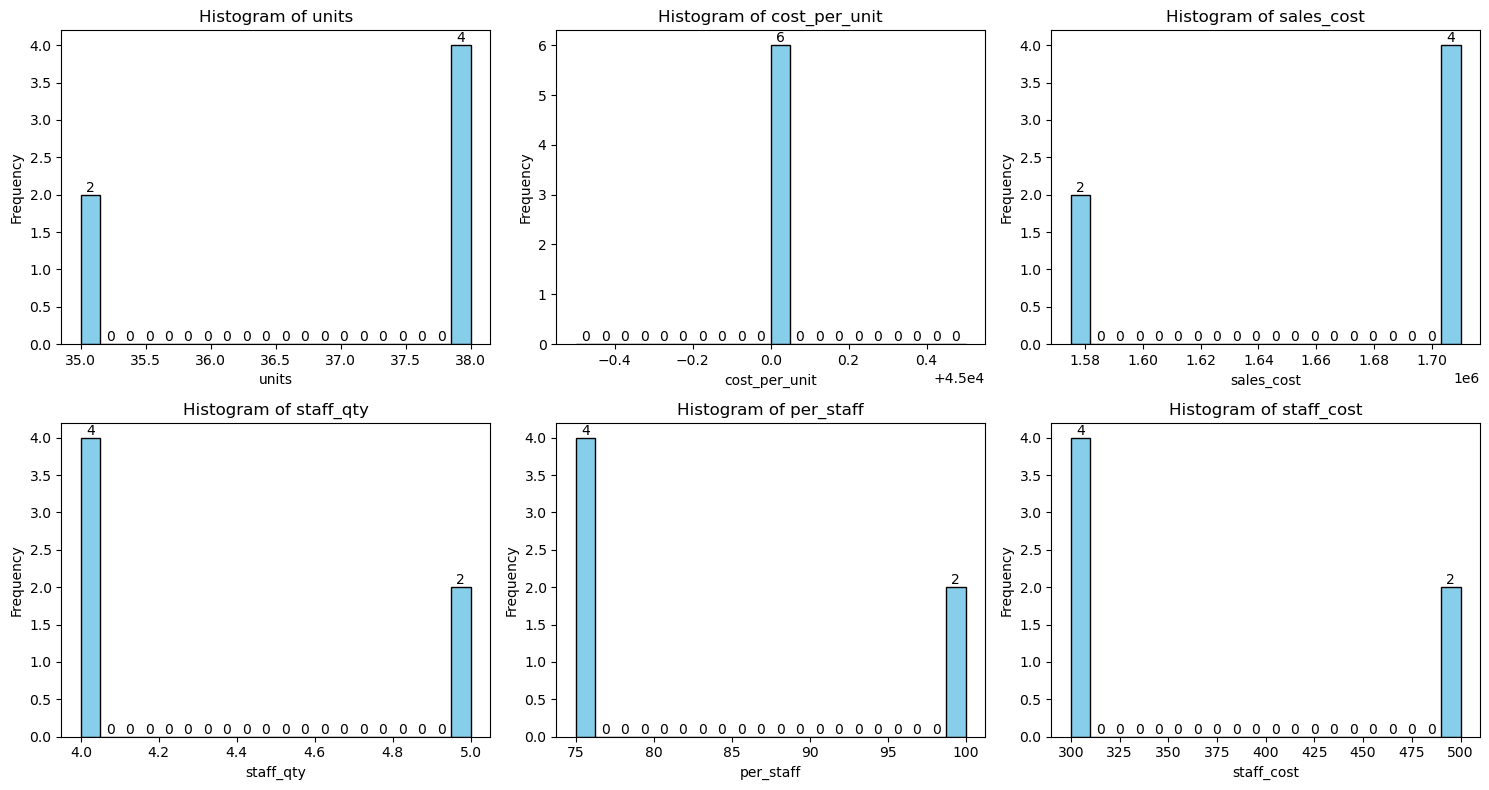

In [9]:
import matplotlib.pyplot as plt

# Create a figure with 2 rows and 3 columns of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# List of parameter names (assuming you have columns with these names)
parameters = ['units', 'cost_per_unit', 'sales_cost', 'staff_qty', 'per_staff', 'staff_cost']

# Loop through the subplots and plot histograms for each parameter
for i, ax in enumerate(axes.flatten()):
    if i < len(parameters):  # Ensure not to exceed the number of parameters
        rp_compressor[parameters[i]].plot(kind='hist', bins=20, color='skyblue', edgecolor='black', ax=ax)
        ax.set_title(f"Histogram of {parameters[i]}")
        ax.set_xlabel(parameters[i])
        ax.set_ylabel("Frequency")

        # Add frequency count annotations to each bar
        for container in ax.containers:
            ax.bar_label(container, fmt='%d', label_type='edge')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


# Rotary screw compressors

In [10]:
rs_compressor = data[data['categories'] == 'Rotary screw compressors']
rs_compressor[['units','cost_per_unit','sales_cost','staff_qty','per_staff','staff_cost']].describe()

,units,cost_per_unit,sales_cost,staff_qty,per_staff,staff_cost
count,7.000000,7.0,7.000000e+00,7.000000,7.000000,7.000000
mean,30.714286,25000.0,7.678571e+05,8.571429,114.285714,1000.000000
std,16.590301,0.0,4.147575e+05,0.975900,24.397502,341.565026
min,21.000000,25000.0,5.250000e+05,8.000000,100.000000,800.000000
25%,21.000000,25000.0,5.250000e+05,8.000000,100.000000,800.000000
50%,21.000000,25000.0,5.250000e+05,8.000000,100.000000,800.000000
75%,38.000000,25000.0,9.500000e+05,9.000000,125.000000,1150.000000
max,55.000000,25000.0,1.375000e+06,10.000000,150.000000,1500.000000


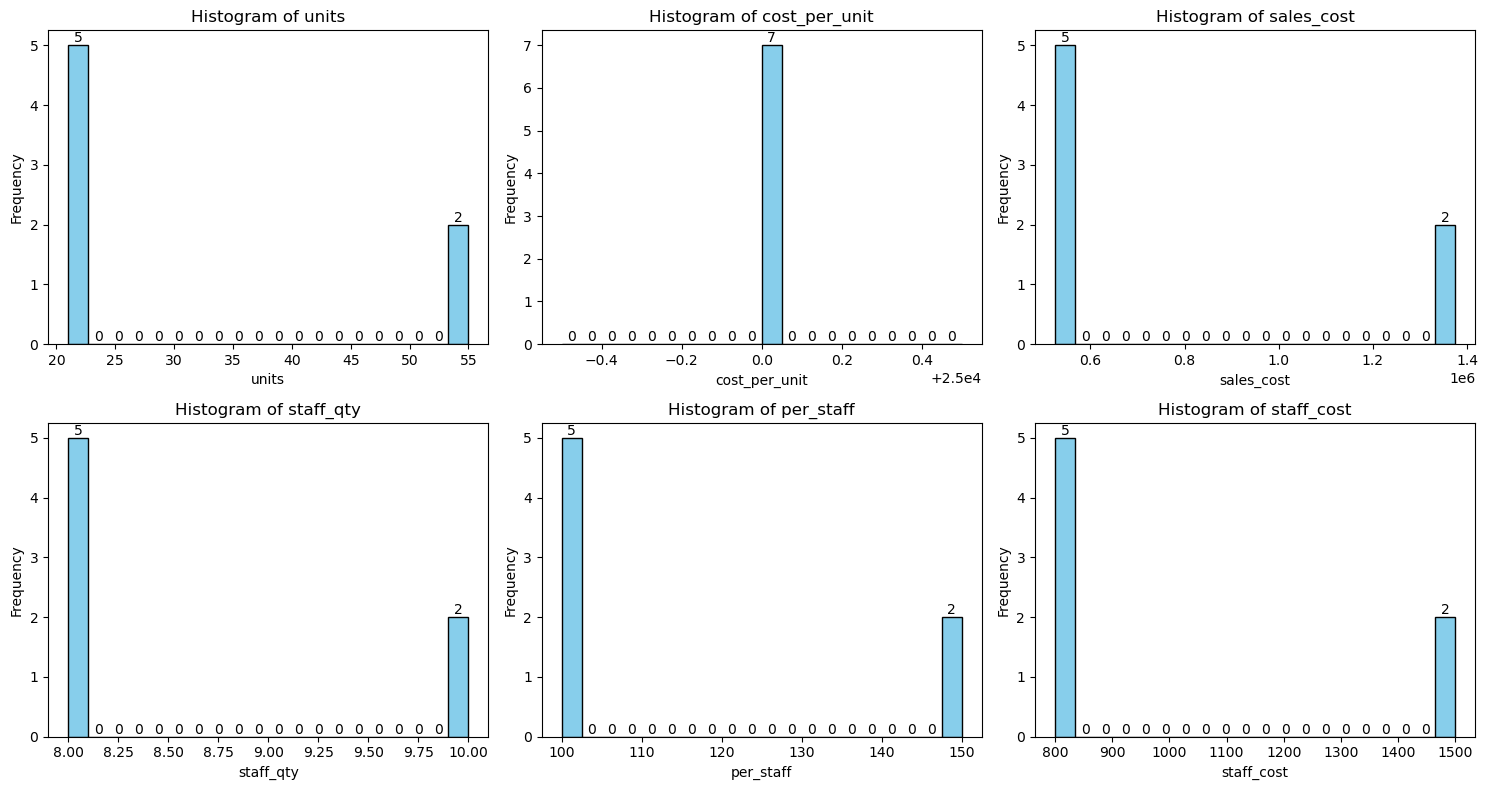

In [11]:
import matplotlib.pyplot as plt

# Create a figure with 2 rows and 3 columns of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# List of parameter names (assuming you have columns with these names)
parameters = ['units', 'cost_per_unit', 'sales_cost', 'staff_qty', 'per_staff', 'staff_cost']

# Loop through the subplots and plot histograms for each parameter
for i, ax in enumerate(axes.flatten()):
    if i < len(parameters):  # Ensure not to exceed the number of parameters
        rs_compressor[parameters[i]].plot(kind='hist', bins=20, color='skyblue', edgecolor='black', ax=ax)
        ax.set_title(f"Histogram of {parameters[i]}")
        ax.set_xlabel(parameters[i])
        ax.set_ylabel("Frequency")

        # Add frequency count annotations to each bar
        for container in ax.containers:
            ax.bar_label(container, fmt='%d', label_type='edge')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


# Oil free compressors

In [12]:
of_compressor = data[data['categories'] == 'Oil free compressors']
of_compressor[['units','cost_per_unit','sales_cost','staff_qty','per_staff','staff_cost']].describe()

,units,cost_per_unit,sales_cost,staff_qty,per_staff,staff_cost
count,17.000000,17.0,1.700000e+01,17.000000,17.000000,17.000000
mean,44.235294,35000.0,1.548235e+06,12.529412,138.235294,1764.705882
std,10.837028,0.0,3.792960e+05,1.178858,29.471447,589.428936
min,32.000000,35000.0,1.120000e+06,12.000000,125.000000,1500.000000
25%,32.000000,35000.0,1.120000e+06,12.000000,125.000000,1500.000000
50%,40.000000,35000.0,1.400000e+06,12.000000,125.000000,1500.000000
75%,55.000000,35000.0,1.925000e+06,12.000000,125.000000,1500.000000
max,55.000000,35000.0,1.925000e+06,15.000000,200.000000,3000.000000


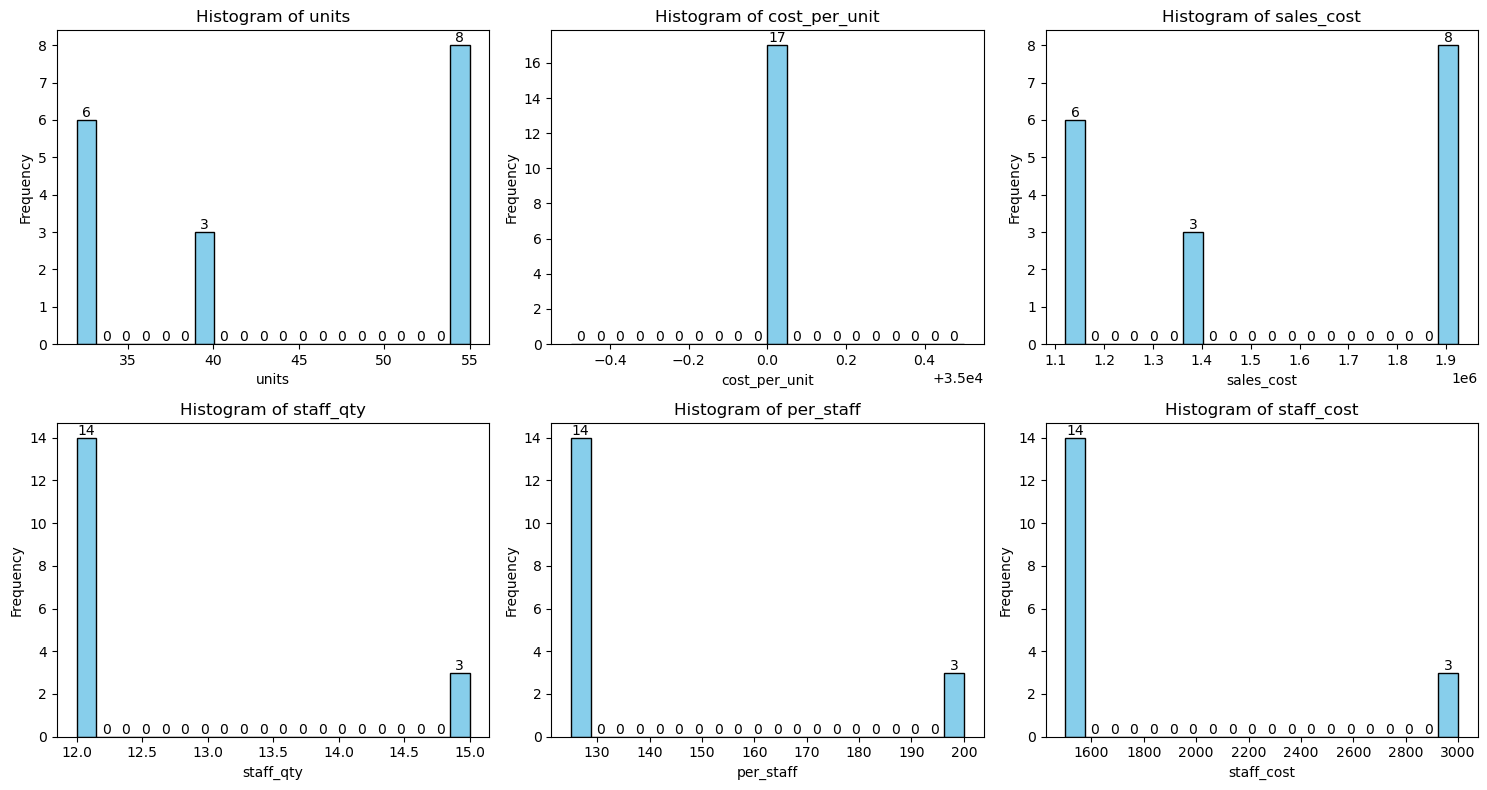

In [13]:
import matplotlib.pyplot as plt

# Create a figure with 2 rows and 3 columns of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# List of parameter names (assuming you have columns with these names)
parameters = ['units', 'cost_per_unit', 'sales_cost', 'staff_qty', 'per_staff', 'staff_cost']

# Loop through the subplots and plot histograms for each parameter
for i, ax in enumerate(axes.flatten()):
    if i < len(parameters):  # Ensure not to exceed the number of parameters
        of_compressor[parameters[i]].plot(kind='hist', bins=20, color='skyblue', edgecolor='black', ax=ax)
        ax.set_title(f"Histogram of {parameters[i]}")
        ax.set_xlabel(parameters[i])
        ax.set_ylabel("Frequency")

        # Add frequency count annotations to each bar
        for container in ax.containers:
            ax.bar_label(container, fmt='%d', label_type='edge')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


# Centrifugal compressors

In [14]:
cf_compressor = data[data['categories'] == 'Centrifugal compressors']
cf_compressor[['units','cost_per_unit','sales_cost','staff_qty','per_staff','staff_cost']].describe()

,units,cost_per_unit,sales_cost,staff_qty,per_staff,staff_cost
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,18.444444,29259.259259,535703.703704,16.592593,164.814815,2785.185185
std,5.183801,5281.262907,176425.799355,1.448056,36.201399,941.236382
min,10.000000,23000.000000,300000.000000,16.000000,150.000000,2400.000000
25%,15.000000,23000.000000,380000.000000,16.000000,150.000000,2400.000000
50%,21.000000,30000.000000,529000.000000,16.000000,150.000000,2400.000000
75%,21.000000,35000.000000,735000.000000,16.000000,150.000000,2400.000000
max,23.000000,35000.000000,735000.000000,20.000000,250.000000,5000.000000


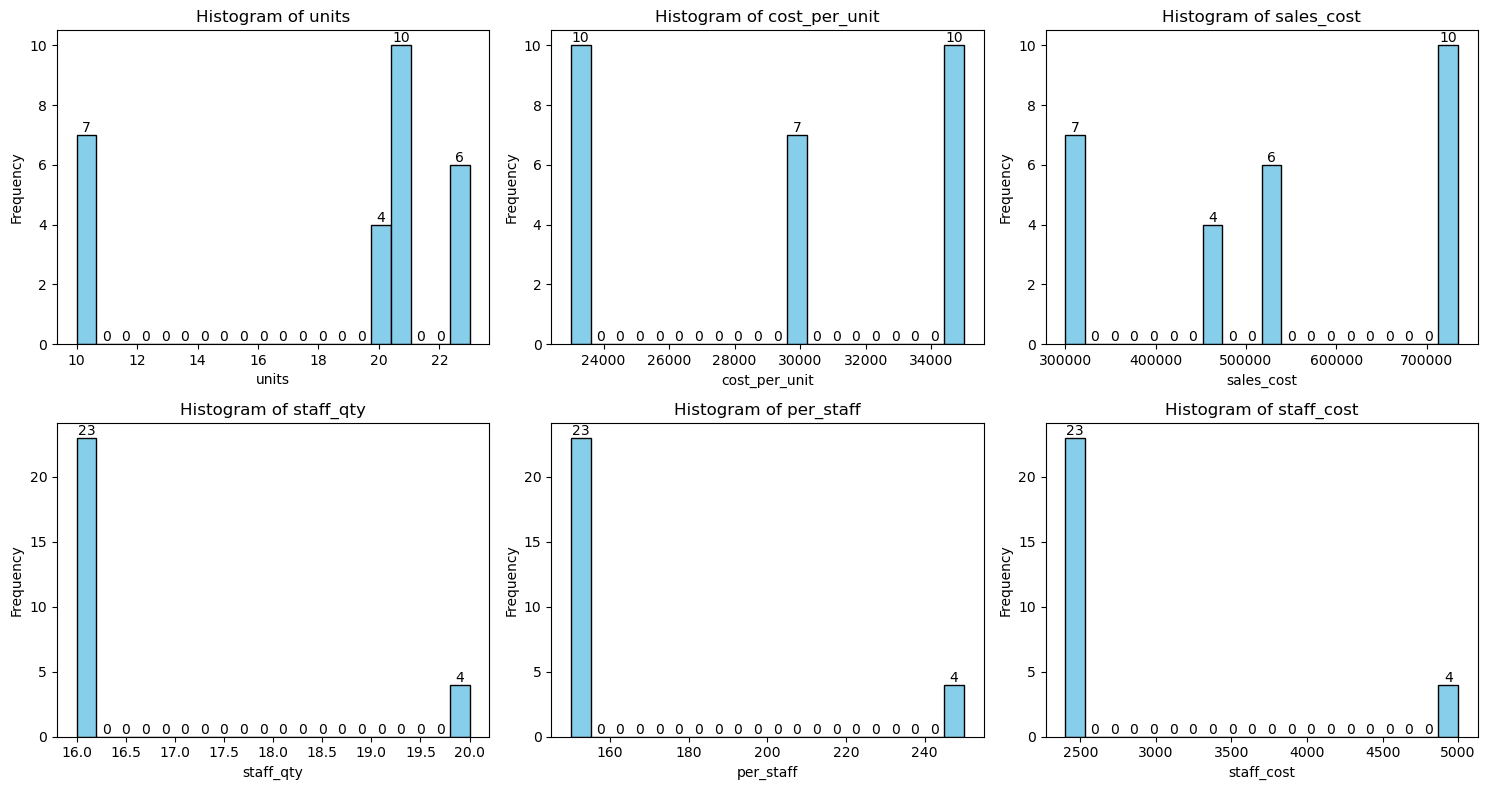

In [15]:
import matplotlib.pyplot as plt

# Create a figure with 2 rows and 3 columns of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# List of parameter names (assuming you have columns with these names)
parameters = ['units', 'cost_per_unit', 'sales_cost', 'staff_qty', 'per_staff', 'staff_cost']

# Loop through the subplots and plot histograms for each parameter
for i, ax in enumerate(axes.flatten()):
    if i < len(parameters):  # Ensure not to exceed the number of parameters
        cf_compressor[parameters[i]].plot(kind='hist', bins=20, color='skyblue', edgecolor='black', ax=ax)
        ax.set_title(f"Histogram of {parameters[i]}")
        ax.set_xlabel(parameters[i])
        ax.set_ylabel("Frequency")

        # Add frequency count annotations to each bar
        for container in ax.containers:
            ax.bar_label(container, fmt='%d', label_type='edge')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


# High-pressure compressors

In [16]:
hp_compressor = data[data['categories'] == 'High-pressure compressors']
hp_compressor[['units','cost_per_unit','sales_cost','staff_qty','per_staff','staff_cost']].describe()

,units,cost_per_unit,sales_cost,staff_qty,per_staff,staff_cost
count,20.000000,20.0,20.000000,20.000000,20.000000,20.000000
mean,22.050000,34000.0,749700.000000,21.250000,206.250000,4500.000000
std,4.661996,0.0,158507.877938,2.221308,55.532707,1777.046633
min,13.000000,34000.0,442000.000000,20.000000,175.000000,3500.000000
25%,24.000000,34000.0,816000.000000,20.000000,175.000000,3500.000000
50%,24.000000,34000.0,816000.000000,20.000000,175.000000,3500.000000
75%,24.250000,34000.0,824500.000000,21.250000,206.250000,4500.000000
max,25.000000,34000.0,850000.000000,25.000000,300.000000,7500.000000


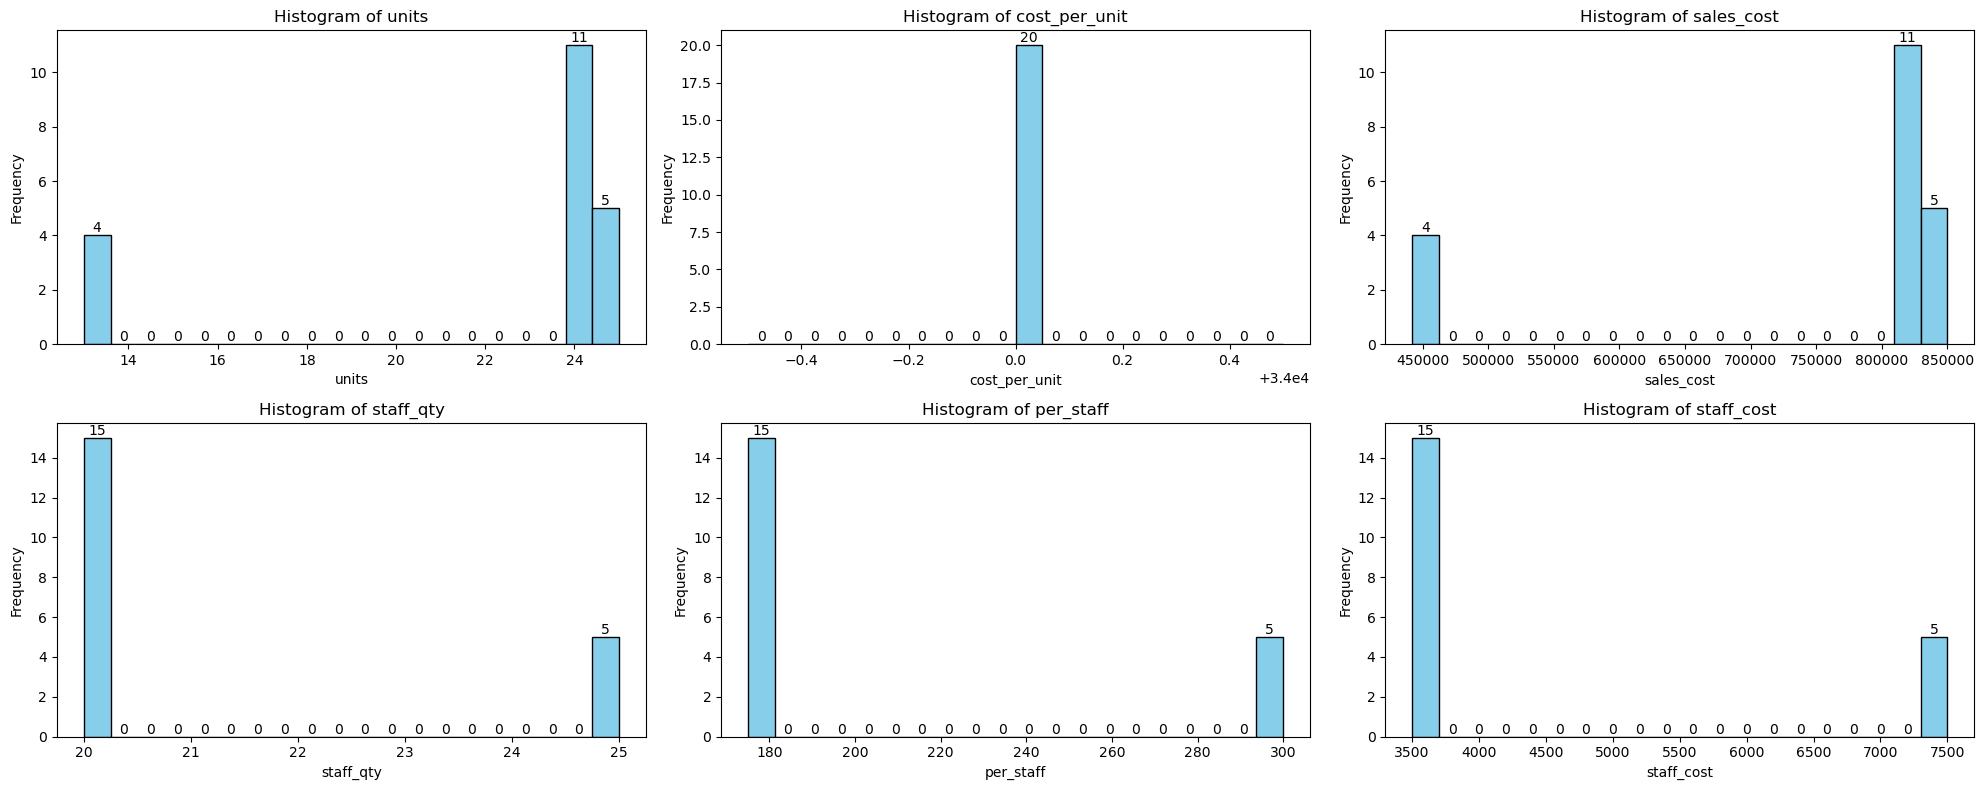

In [17]:
import matplotlib.pyplot as plt

# Create a figure with 2 rows and 3 columns of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 8))

# List of parameter names (assuming you have columns with these names)
parameters = ['units', 'cost_per_unit', 'sales_cost', 'staff_qty', 'per_staff', 'staff_cost']

# Loop through the subplots and plot histograms for each parameter
for i, ax in enumerate(axes.flatten()):
    if i < len(parameters):  # Ensure not to exceed the number of parameters
        hp_compressor[parameters[i]].plot(kind='hist', bins=20, color='skyblue', edgecolor='black', ax=ax)
        ax.set_title(f"Histogram of {parameters[i]}")
        ax.set_xlabel(parameters[i])
        ax.set_ylabel("Frequency")

        # Add frequency count annotations to each bar
        for container in ax.containers:
            ax.bar_label(container, fmt='%d', label_type='edge')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


# Portable compressors

In [18]:
p_compressor = data[data['categories'] == 'Portable compressors']
p_compressor[['units','cost_per_unit','sales_cost','staff_qty','per_staff','staff_cost']].describe()

,units,cost_per_unit,sales_cost,staff_qty,per_staff,staff_cost
count,6.0,6.0,6.0,6.0,6.0,6.0
mean,27.0,15000.0,405000.0,30.0,350.0,10500.0
std,0.0,0.0,0.0,0.0,0.0,0.0
min,27.0,15000.0,405000.0,30.0,350.0,10500.0
25%,27.0,15000.0,405000.0,30.0,350.0,10500.0
50%,27.0,15000.0,405000.0,30.0,350.0,10500.0
75%,27.0,15000.0,405000.0,30.0,350.0,10500.0
max,27.0,15000.0,405000.0,30.0,350.0,10500.0


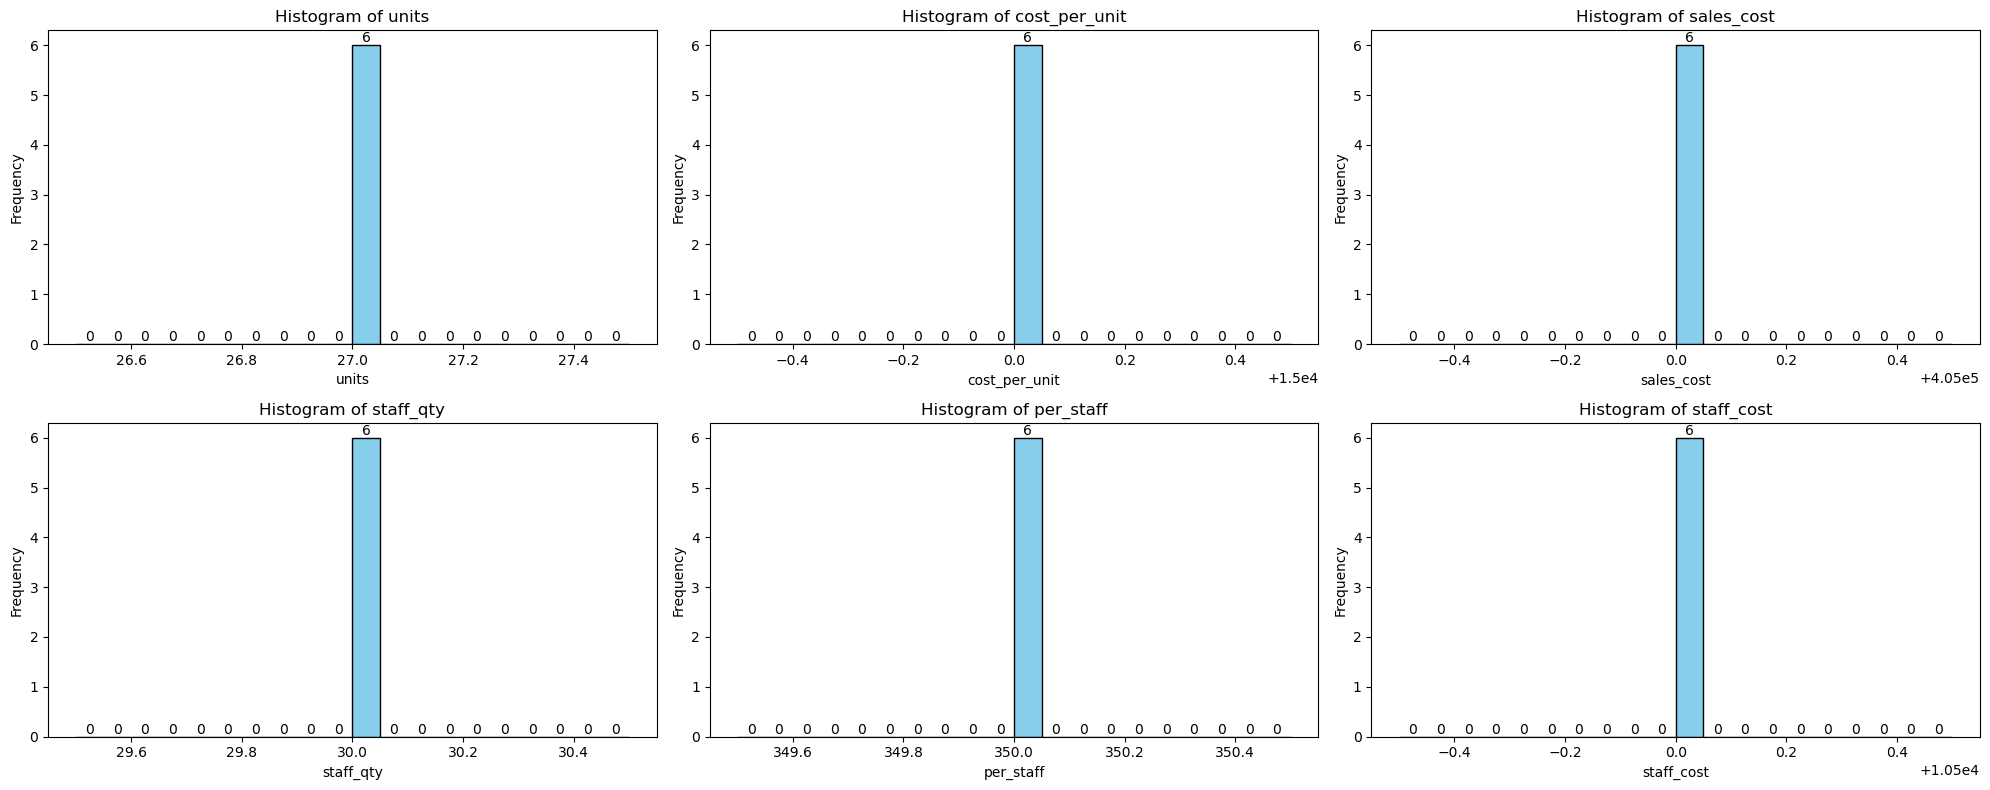

In [19]:
import matplotlib.pyplot as plt

# Create a figure with 2 rows and 3 columns of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 8))

# List of parameter names (assuming you have columns with these names)
parameters = ['units', 'cost_per_unit', 'sales_cost', 'staff_qty', 'per_staff', 'staff_cost']

# Loop through the subplots and plot histograms for each parameter
for i, ax in enumerate(axes.flatten()):
    if i < len(parameters):  # Ensure not to exceed the number of parameters
        p_compressor[parameters[i]].plot(kind='hist', bins=20, color='skyblue', edgecolor='black', ax=ax)
        ax.set_title(f"Histogram of {parameters[i]}")
        ax.set_xlabel(parameters[i])
        ax.set_ylabel("Frequency")

        # Add frequency count annotations to each bar
        for container in ax.containers:
            ax.bar_label(container, fmt='%d', label_type='edge')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


# Low pressure compressors

In [20]:
lp_compressor = data[data['categories'] == 'Low pressure compressors']
lp_compressor[['units','cost_per_unit','sales_cost','staff_qty','per_staff','staff_cost']].describe()

,units,cost_per_unit,sales_cost,staff_qty,per_staff,staff_cost
count,8.000000,8.0,8.000000,8.000000,8.000000,8.000000
mean,34.250000,25000.0,856250.000000,34.125000,378.125000,13037.500000
std,7.778175,0.0,194454.364826,2.474874,61.871843,2722.361108
min,15.000000,25000.0,375000.000000,28.000000,225.000000,6300.000000
25%,37.000000,25000.0,925000.000000,35.000000,400.000000,14000.000000
50%,37.000000,25000.0,925000.000000,35.000000,400.000000,14000.000000
75%,37.000000,25000.0,925000.000000,35.000000,400.000000,14000.000000
max,37.000000,25000.0,925000.000000,35.000000,400.000000,14000.000000


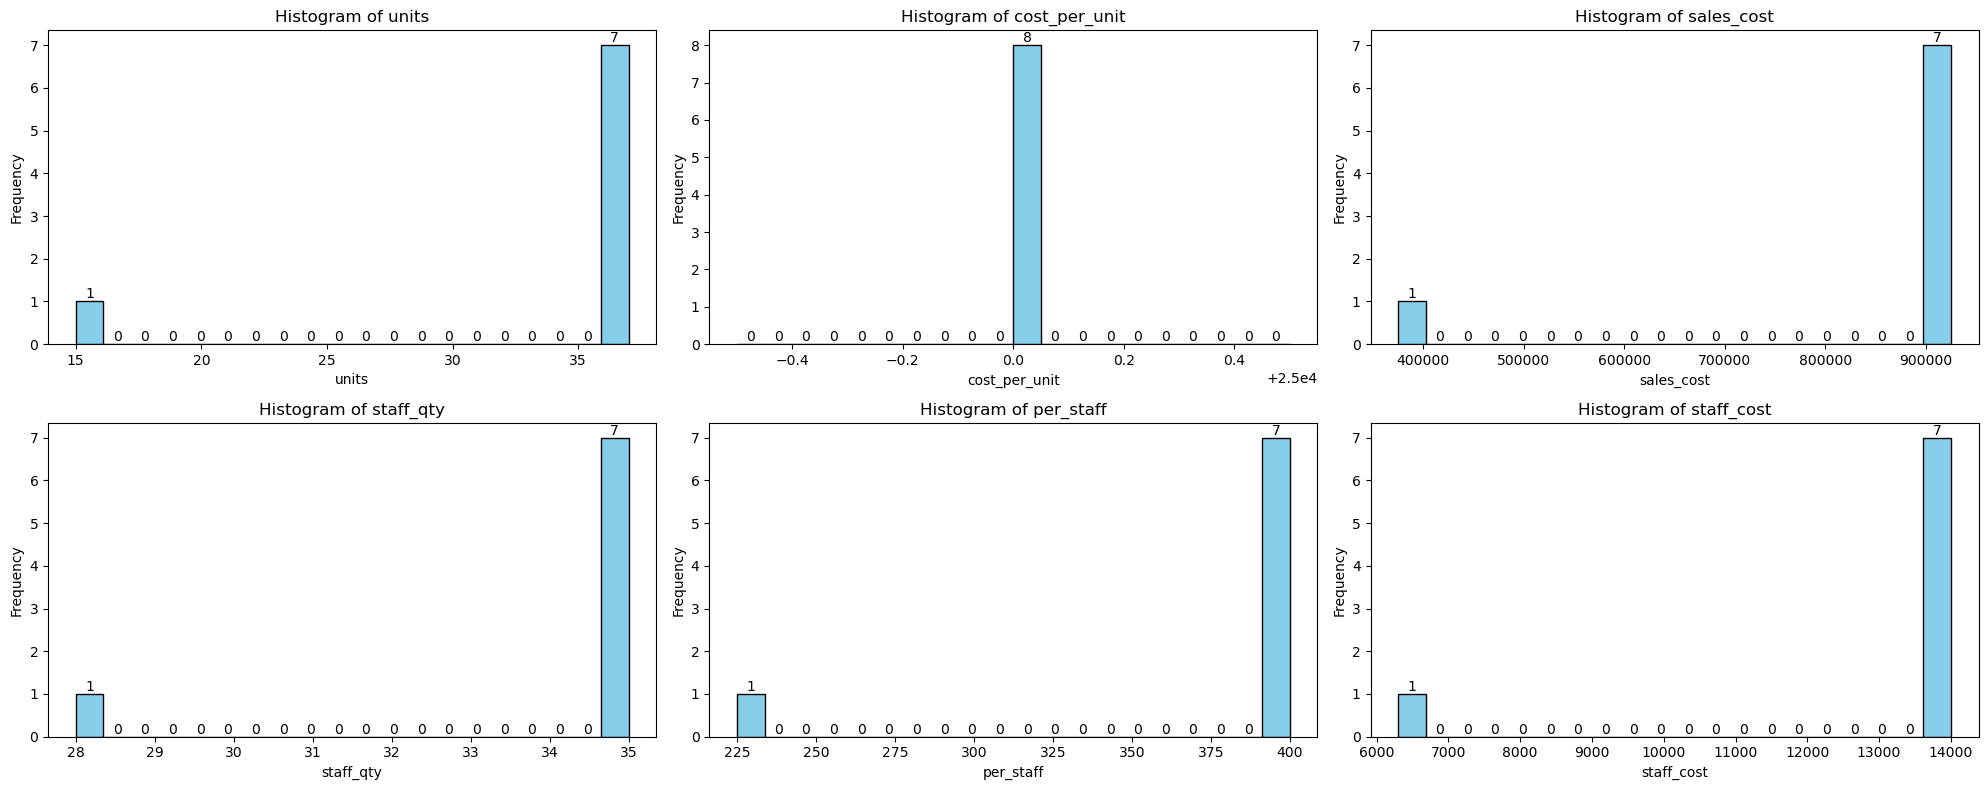

In [21]:
import matplotlib.pyplot as plt

# Create a figure with 2 rows and 3 columns of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 8))

# List of parameter names (assuming you have columns with these names)
parameters = ['units', 'cost_per_unit', 'sales_cost', 'staff_qty', 'per_staff', 'staff_cost']

# Loop through the subplots and plot histograms for each parameter
for i, ax in enumerate(axes.flatten()):
    if i < len(parameters):  # Ensure not to exceed the number of parameters
        lp_compressor[parameters[i]].plot(kind='hist', bins=20, color='skyblue', edgecolor='black', ax=ax)
        ax.set_title(f"Histogram of {parameters[i]}")
        ax.set_xlabel(parameters[i])
        ax.set_ylabel("Frequency")

        # Add frequency count annotations to each bar
        for container in ax.containers:
            ax.bar_label(container, fmt='%d', label_type='edge')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


# Gas compressors

In [22]:
g_compressor = data[data['categories'] == 'Gas compressors']
g_compressor[['units','cost_per_unit','sales_cost','staff_qty','per_staff','staff_cost']].describe()

,units,cost_per_unit,sales_cost,staff_qty,per_staff,staff_cost
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,28.200000,19200.000000,534400.000000,38.400000,410.000000,16000.000000
std,1.686548,4638.007235,87278.863421,3.373096,84.327404,4216.370214
min,25.000000,17000.000000,493000.000000,32.000000,250.000000,8000.000000
25%,29.000000,17000.000000,493000.000000,40.000000,450.000000,18000.000000
50%,29.000000,17000.000000,493000.000000,40.000000,450.000000,18000.000000
75%,29.000000,17000.000000,493000.000000,40.000000,450.000000,18000.000000
max,29.000000,28000.000000,700000.000000,40.000000,450.000000,18000.000000


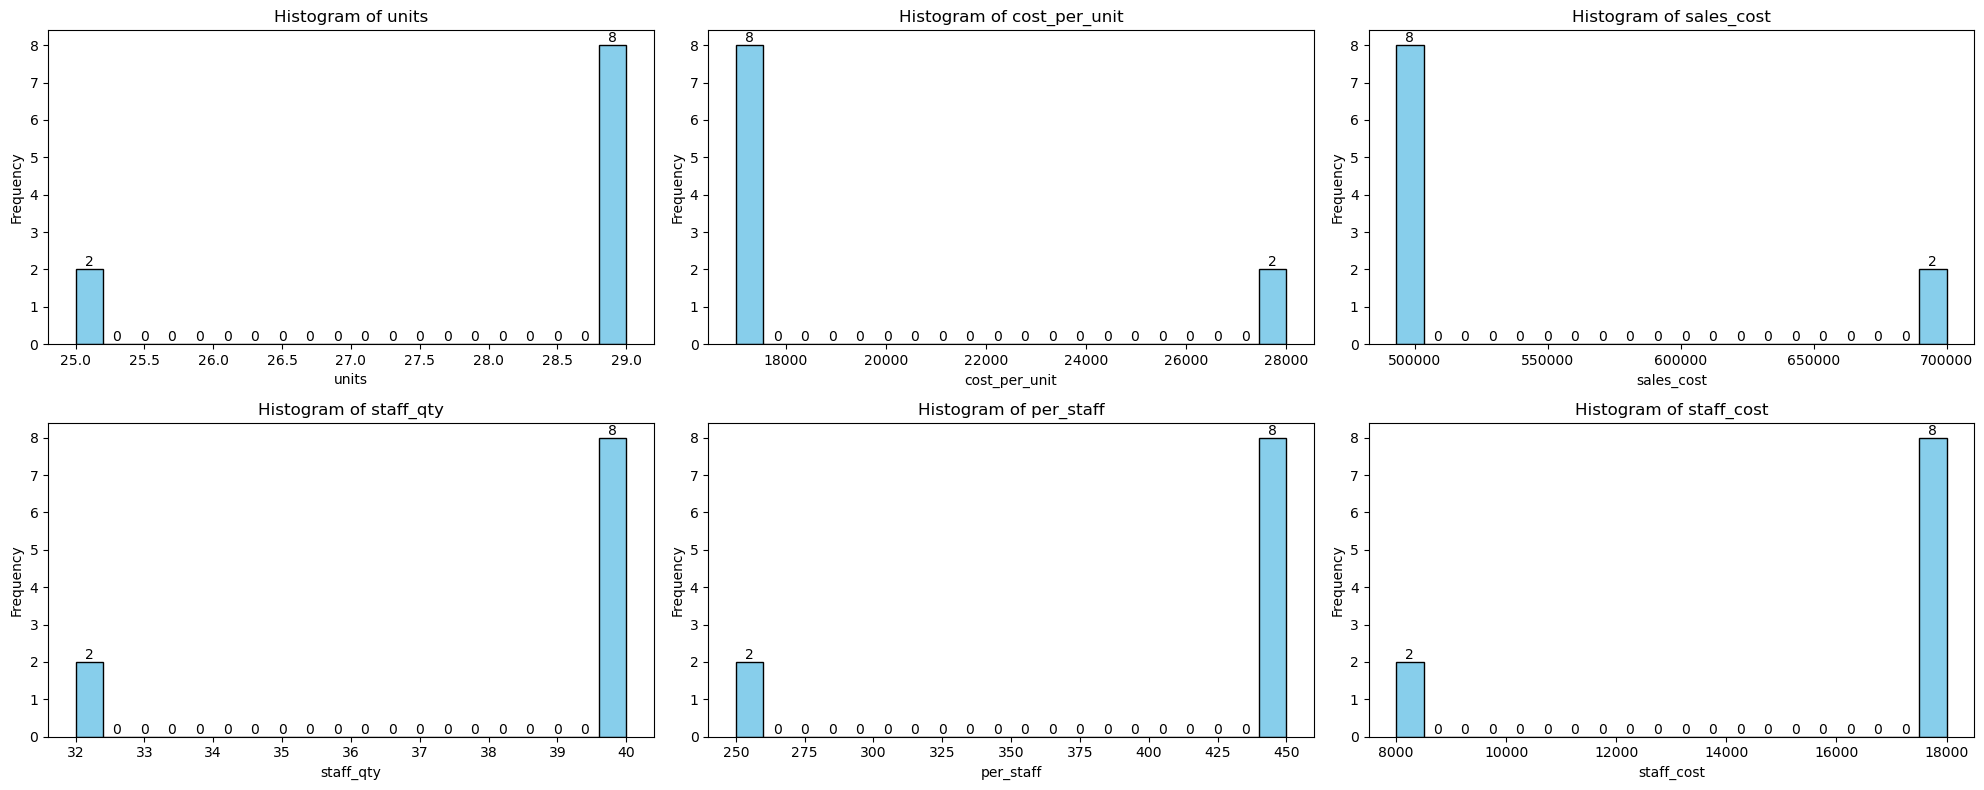

In [23]:
import matplotlib.pyplot as plt

# Create a figure with 2 rows and 3 columns of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 8))

# List of parameter names (assuming you have columns with these names)
parameters = ['units', 'cost_per_unit', 'sales_cost', 'staff_qty', 'per_staff', 'staff_cost']

# Loop through the subplots and plot histograms for each parameter
for i, ax in enumerate(axes.flatten()):
    if i < len(parameters):  # Ensure not to exceed the number of parameters
        g_compressor[parameters[i]].plot(kind='hist', bins=20, color='skyblue', edgecolor='black', ax=ax)
        ax.set_title(f"Histogram of {parameters[i]}")
        ax.set_xlabel(parameters[i])
        ax.set_ylabel("Frequency")

        # Add frequency count annotations to each bar
        for container in ax.containers:
            ax.bar_label(container, fmt='%d', label_type='edge')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


# Compressed air system

In [24]:
cas_compressor = data[data['categories'] == 'Compressed air system']
cas_compressor[['units','cost_per_unit','sales_cost','staff_qty','per_staff','staff_cost']].describe()

,units,cost_per_unit,sales_cost,staff_qty,per_staff,staff_cost
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000
mean,29.500000,23700.000000,651900.000000,39.150000,353.750000,14310.00000
std,5.689325,8808.488729,157910.667617,4.404244,110.106109,6165.94211
min,25.000000,12000.000000,444000.000000,36.000000,275.000000,9900.00000
25%,25.000000,12000.000000,444000.000000,36.000000,275.000000,9900.00000
50%,26.000000,30000.000000,750000.000000,36.000000,275.000000,9900.00000
75%,37.000000,30000.000000,750000.000000,45.000000,500.000000,22500.00000
max,37.000000,30000.000000,810000.000000,45.000000,500.000000,22500.00000


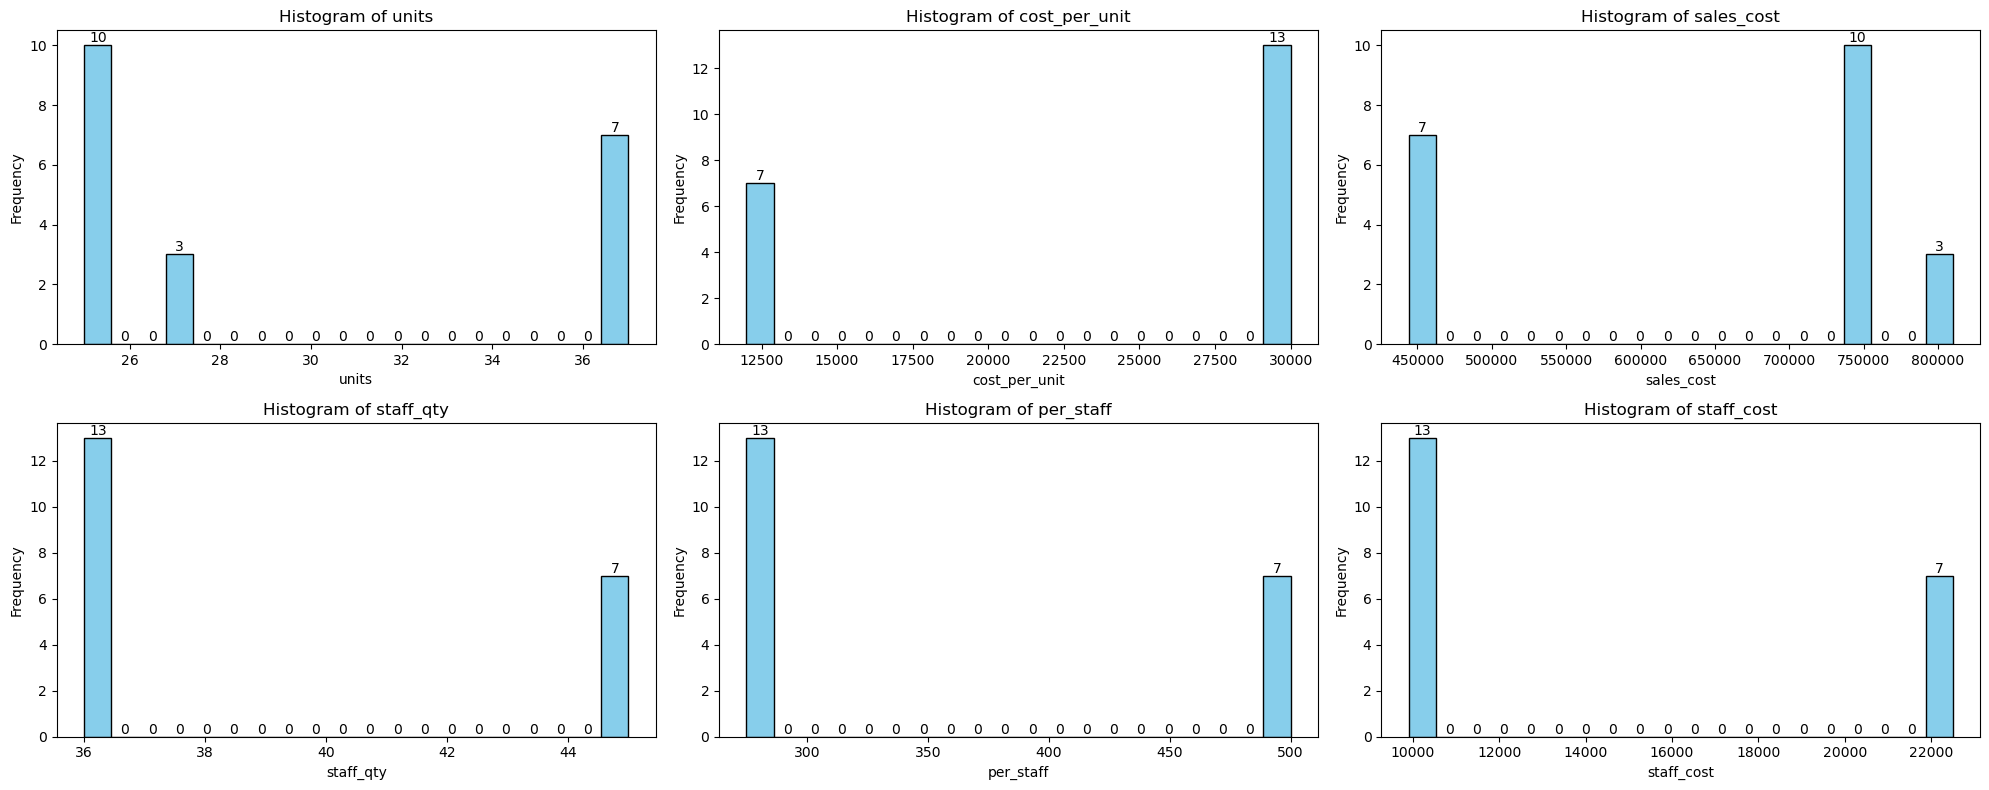

In [25]:
import matplotlib.pyplot as plt

# Create a figure with 2 rows and 3 columns of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 8))

# List of parameter names (assuming you have columns with these names)
parameters = ['units', 'cost_per_unit', 'sales_cost', 'staff_qty', 'per_staff', 'staff_cost']

# Loop through the subplots and plot histograms for each parameter
for i, ax in enumerate(axes.flatten()):
    if i < len(parameters):  # Ensure not to exceed the number of parameters
        cas_compressor[parameters[i]].plot(kind='hist', bins=20, color='skyblue', edgecolor='black', ax=ax)
        ax.set_title(f"Histogram of {parameters[i]}")
        ax.set_xlabel(parameters[i])
        ax.set_ylabel("Frequency")

        # Add frequency count annotations to each bar
        for container in ax.containers:
            ax.bar_label(container, fmt='%d', label_type='edge')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


# Customized solutions

In [26]:
cust_compressor = data[data['categories'] == 'Compressed air system']
cust_compressor[['units','cost_per_unit','sales_cost','staff_qty','per_staff','staff_cost']].describe()

,units,cost_per_unit,sales_cost,staff_qty,per_staff,staff_cost
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000
mean,29.500000,23700.000000,651900.000000,39.150000,353.750000,14310.00000
std,5.689325,8808.488729,157910.667617,4.404244,110.106109,6165.94211
min,25.000000,12000.000000,444000.000000,36.000000,275.000000,9900.00000
25%,25.000000,12000.000000,444000.000000,36.000000,275.000000,9900.00000
50%,26.000000,30000.000000,750000.000000,36.000000,275.000000,9900.00000
75%,37.000000,30000.000000,750000.000000,45.000000,500.000000,22500.00000
max,37.000000,30000.000000,810000.000000,45.000000,500.000000,22500.00000


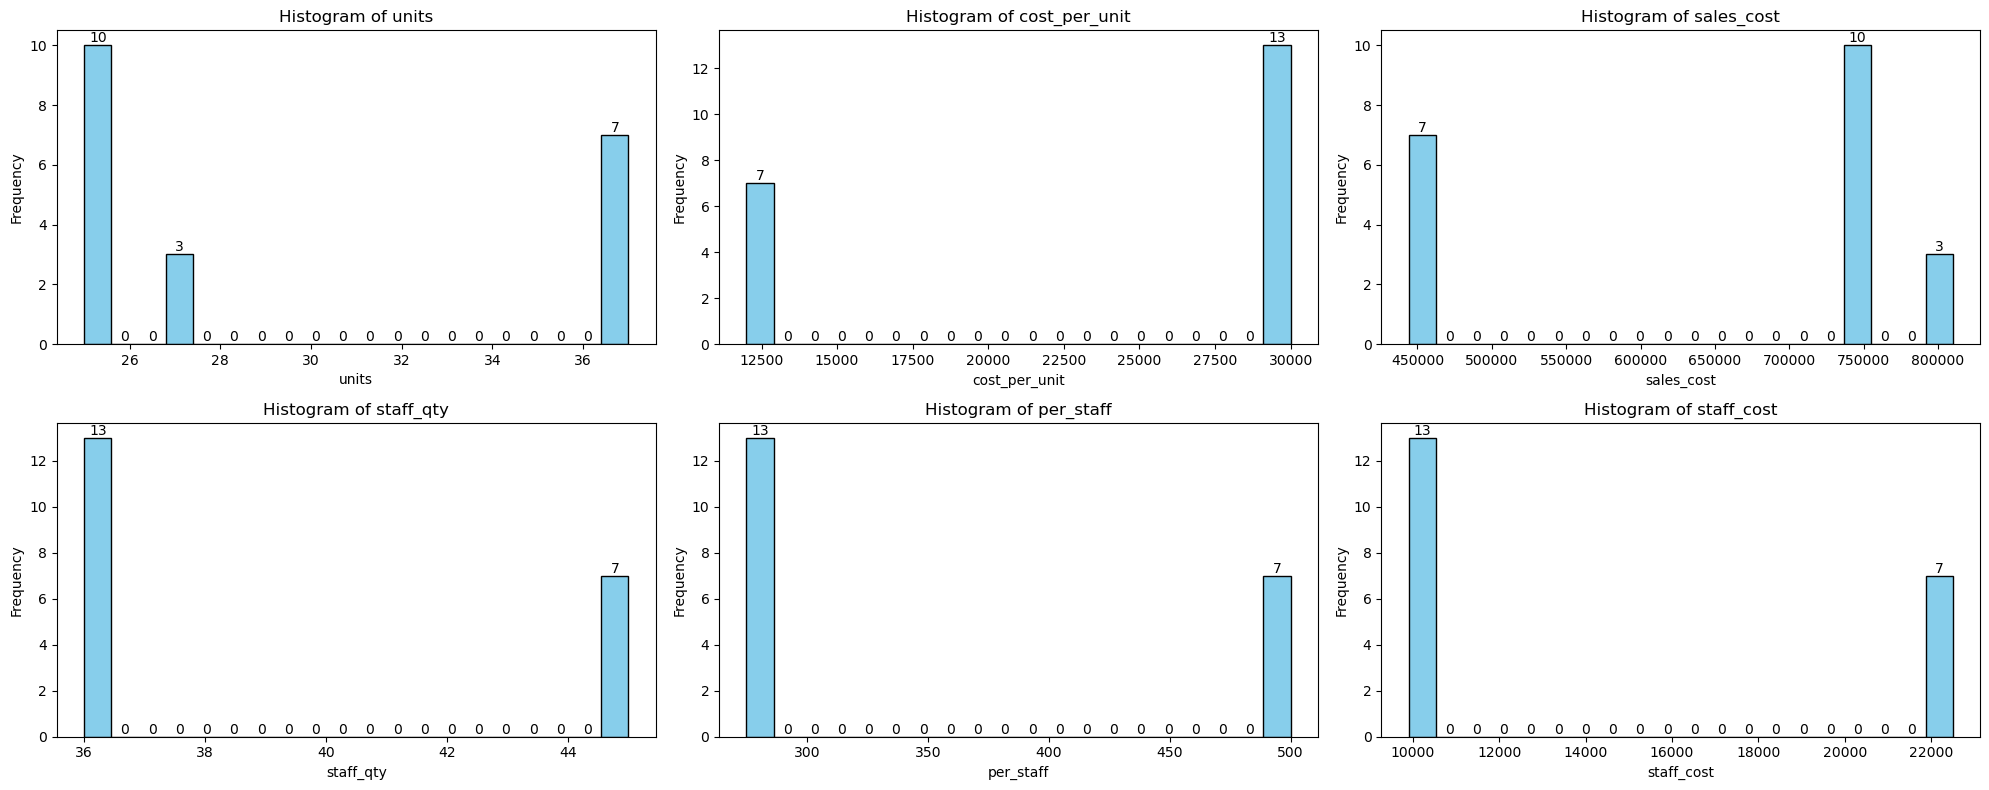

In [27]:
import matplotlib.pyplot as plt

# Create a figure with 2 rows and 3 columns of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 8))

# List of parameter names (assuming you have columns with these names)
parameters = ['units', 'cost_per_unit', 'sales_cost', 'staff_qty', 'per_staff', 'staff_cost']

# Loop through the subplots and plot histograms for each parameter
for i, ax in enumerate(axes.flatten()):
    if i < len(parameters):  # Ensure not to exceed the number of parameters
        cust_compressor[parameters[i]].plot(kind='hist', bins=20, color='skyblue', edgecolor='black', ax=ax)
        ax.set_title(f"Histogram of {parameters[i]}")
        ax.set_xlabel(parameters[i])
        ax.set_ylabel("Frequency")

        # Add frequency count annotations to each bar
        for container in ax.containers:
            ax.bar_label(container, fmt='%d', label_type='edge')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


# Region wise analysis

# India Sales

In [32]:
India_sales = data[data['region'] == 'India']
India_sales[['units','cost_per_unit','sales_cost','staff_qty','per_staff','staff_cost']].describe()

,units,cost_per_unit,sales_cost,staff_qty,per_staff,staff_cost
count,12.000000,12.000000,1.200000e+01,12.000000,12.000000,12.000000
mean,26.666667,32500.000000,8.875000e+05,30.833333,245.833333,8333.333333
std,3.892495,5838.742081,3.211308e+05,12.066734,68.118658,3658.945038
min,25.000000,30000.000000,7.500000e+05,5.000000,100.000000,500.000000
25%,25.000000,30000.000000,7.500000e+05,36.000000,275.000000,9900.000000
50%,25.000000,30000.000000,7.500000e+05,36.000000,275.000000,9900.000000
75%,25.000000,30000.000000,7.500000e+05,36.000000,275.000000,9900.000000
max,35.000000,45000.000000,1.575000e+06,36.000000,275.000000,9900.000000


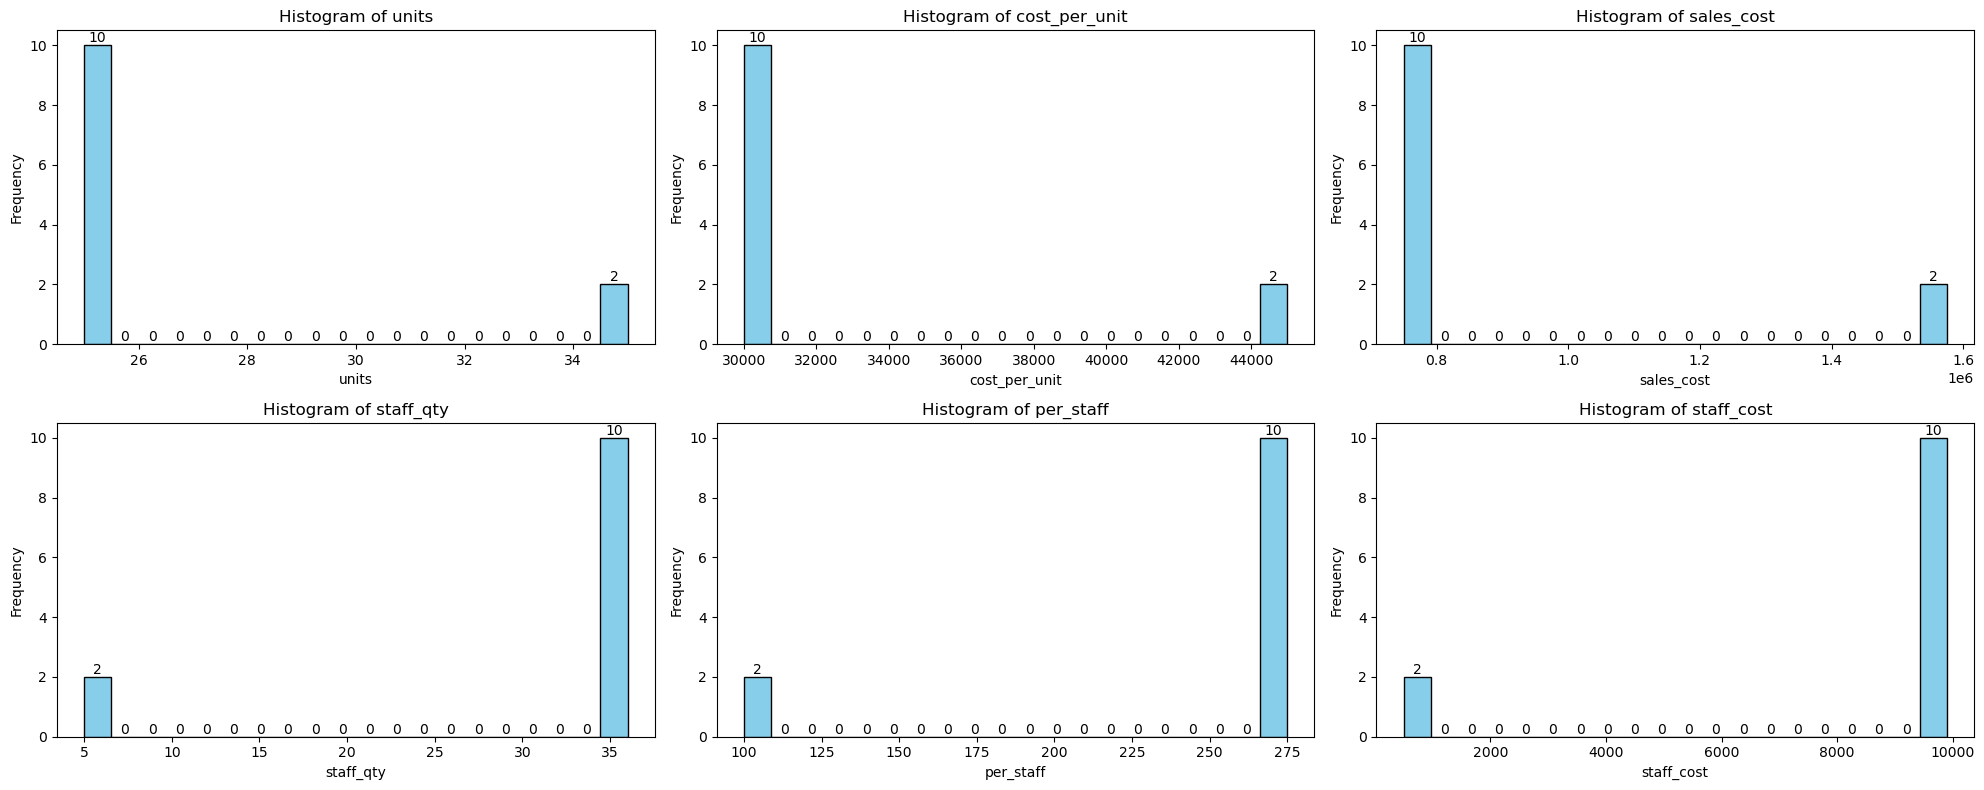

In [33]:
import matplotlib.pyplot as plt

# Create a figure with 2 rows and 3 columns of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 8))

# List of parameter names (assuming you have columns with these names)
parameters = ['units', 'cost_per_unit', 'sales_cost', 'staff_qty', 'per_staff', 'staff_cost']

# Loop through the subplots and plot histograms for each parameter
for i, ax in enumerate(axes.flatten()):
    if i < len(parameters):  # Ensure not to exceed the number of parameters
        India_sales[parameters[i]].plot(kind='hist', bins=20, color='skyblue', edgecolor='black', ax=ax)
        ax.set_title(f"Histogram of {parameters[i]}")
        ax.set_xlabel(parameters[i])
        ax.set_ylabel("Frequency")

        # Add frequency count annotations to each bar
        for container in ax.containers:
            ax.bar_label(container, fmt='%d', label_type='edge')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


# USA Sales

In [34]:
USA_sales = data[data['region'] == 'USA']
USA_sales[['units','cost_per_unit','sales_cost','staff_qty','per_staff','staff_cost']].describe()

,units,cost_per_unit,sales_cost,staff_qty,per_staff,staff_cost
count,25.000000,25.000000,2.500000e+01,25.000000,25.000000,25.000000
mean,41.640000,34200.000000,1.413400e+06,31.440000,302.000000,12140.000000
std,14.361058,2768.874621,4.826721e+05,17.005097,174.092887,10769.865366
min,22.000000,25000.000000,7.700000e+05,10.000000,125.000000,1500.000000
25%,22.000000,35000.000000,7.700000e+05,12.000000,125.000000,1500.000000
50%,45.000000,35000.000000,1.575000e+06,40.000000,300.000000,12000.000000
75%,55.000000,35000.000000,1.925000e+06,50.000000,550.000000,27500.000000
max,55.000000,35000.000000,1.925000e+06,50.000000,550.000000,27500.000000


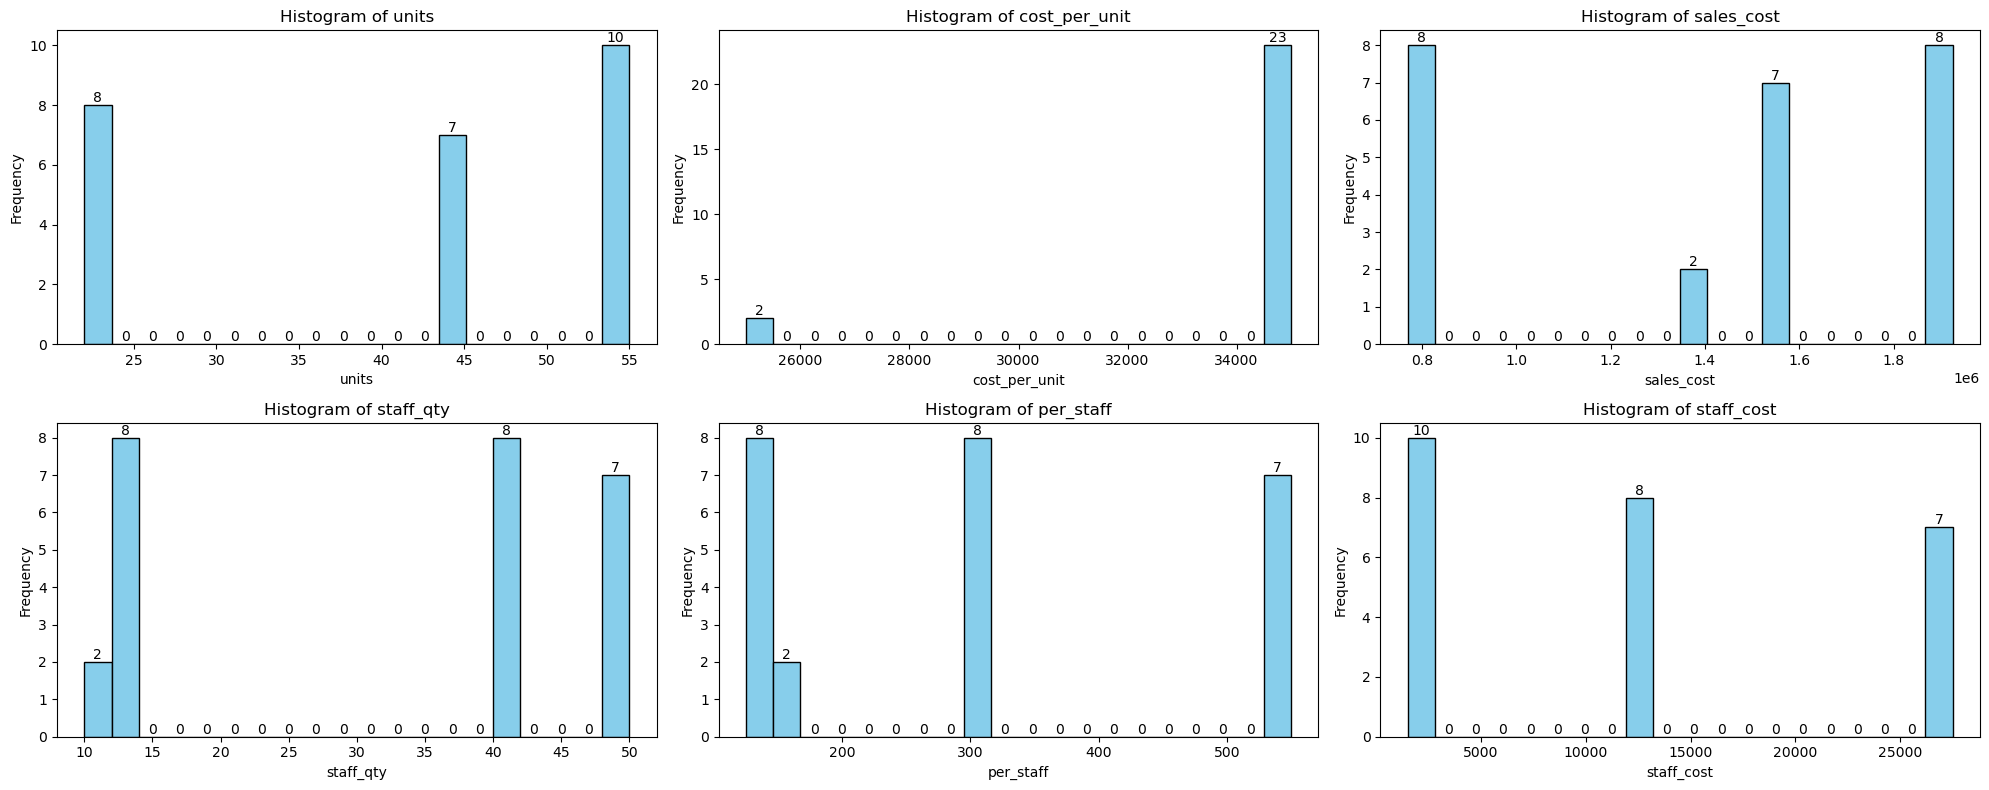

In [35]:
import matplotlib.pyplot as plt

# Create a figure with 2 rows and 3 columns of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 8))

# List of parameter names (assuming you have columns with these names)
parameters = ['units', 'cost_per_unit', 'sales_cost', 'staff_qty', 'per_staff', 'staff_cost']

# Loop through the subplots and plot histograms for each parameter
for i, ax in enumerate(axes.flatten()):
    if i < len(parameters):  # Ensure not to exceed the number of parameters
        USA_sales[parameters[i]].plot(kind='hist', bins=20, color='skyblue', edgecolor='black', ax=ax)
        ax.set_title(f"Histogram of {parameters[i]}")
        ax.set_xlabel(parameters[i])
        ax.set_ylabel("Frequency")

        # Add frequency count annotations to each bar
        for container in ax.containers:
            ax.bar_label(container, fmt='%d', label_type='edge')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


# Europe sales

In [38]:
Europe_sales = data[data['region'] == 'Europe']
Europe_sales[['units','cost_per_unit','sales_cost','staff_qty','per_staff','staff_cost']].describe()

,units,cost_per_unit,sales_cost,staff_qty,per_staff,staff_cost
count,10.000000,10.000000,1.000000e+01,10.000000,10.000000,10.000000
mean,19.000000,31500.000000,6.300000e+05,15.700000,165.000000,2580.000000
std,14.491377,2415.229458,5.313505e+05,0.483046,24.152295,289.827535
min,10.000000,30000.000000,3.000000e+05,15.000000,150.000000,2400.000000
25%,10.000000,30000.000000,3.000000e+05,15.250000,150.000000,2400.000000
50%,10.000000,30000.000000,3.000000e+05,16.000000,150.000000,2400.000000
75%,32.500000,33750.000000,1.125000e+06,16.000000,187.500000,2850.000000
max,40.000000,35000.000000,1.400000e+06,16.000000,200.000000,3000.000000


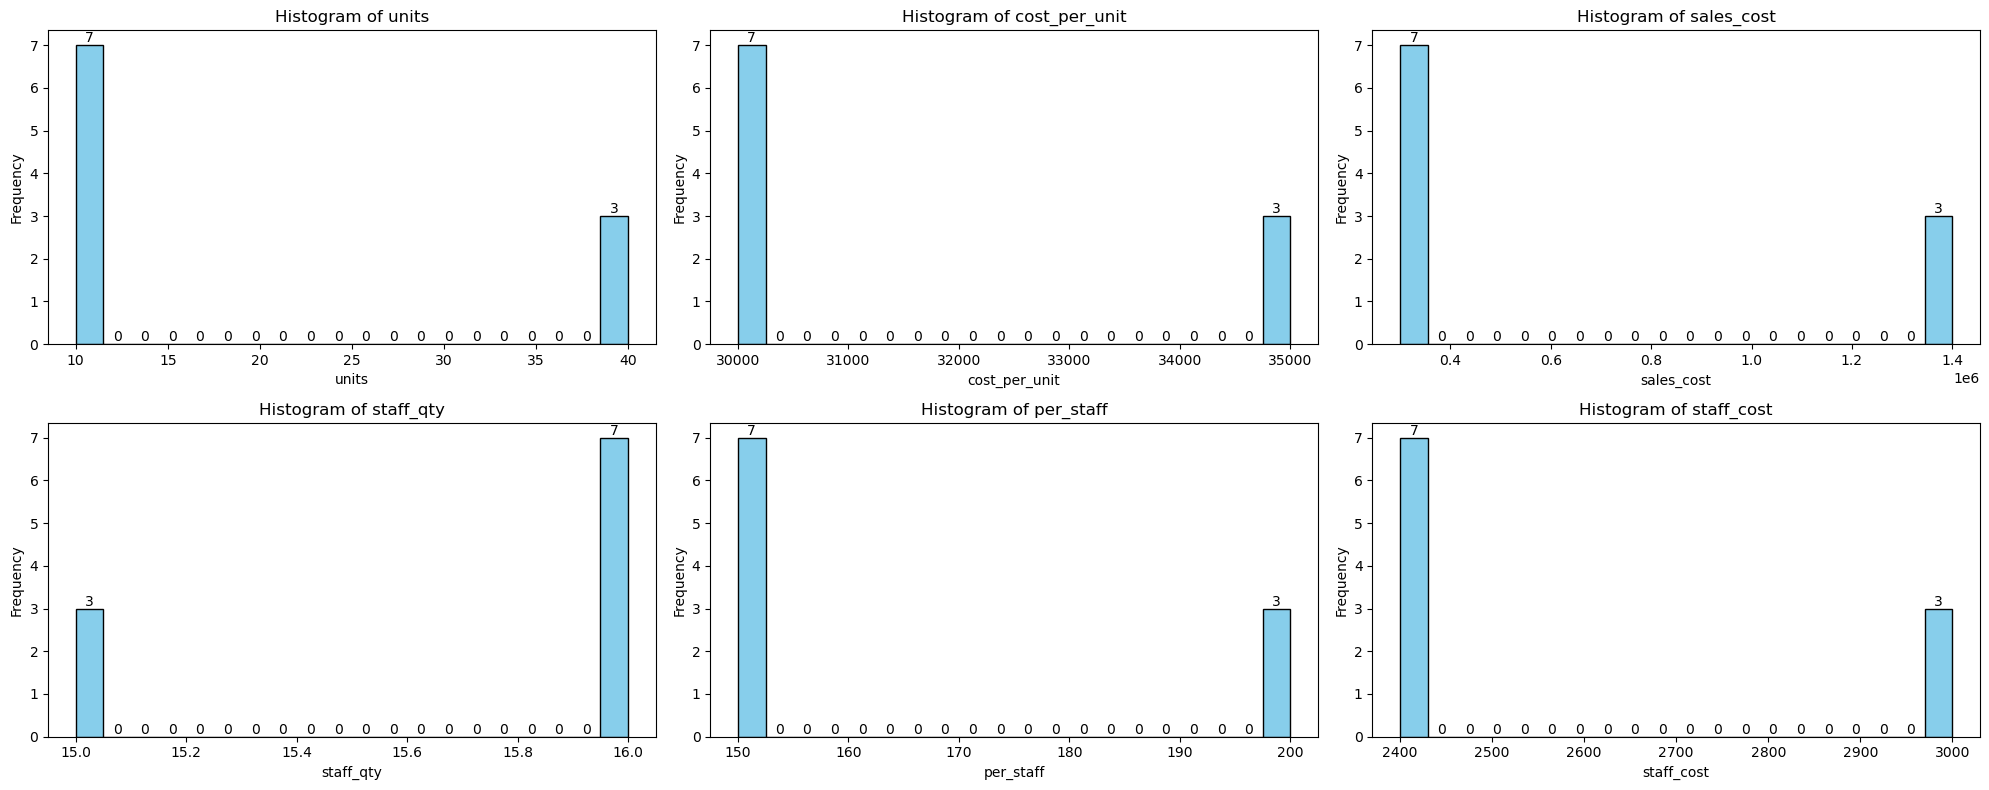

In [39]:
import matplotlib.pyplot as plt

# Create a figure with 2 rows and 3 columns of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 8))

# List of parameter names (assuming you have columns with these names)
parameters = ['units', 'cost_per_unit', 'sales_cost', 'staff_qty', 'per_staff', 'staff_cost']

# Loop through the subplots and plot histograms for each parameter
for i, ax in enumerate(axes.flatten()):
    if i < len(parameters):  # Ensure not to exceed the number of parameters
        Europe_sales[parameters[i]].plot(kind='hist', bins=20, color='skyblue', edgecolor='black', ax=ax)
        ax.set_title(f"Histogram of {parameters[i]}")
        ax.set_xlabel(parameters[i])
        ax.set_ylabel("Frequency")

        # Add frequency count annotations to each bar
        for container in ax.containers:
            ax.bar_label(container, fmt='%d', label_type='edge')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


# Middle east sales

In [40]:
MiddleEast_sales = data[data['region'] == 'Middle east']
MiddleEast_sales[['units','cost_per_unit','sales_cost','staff_qty','per_staff','staff_cost']].describe()

,units,cost_per_unit,sales_cost,staff_qty,per_staff,staff_cost
count,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000
mean,19.000000,23400.000000,443000.000000,21.600000,245.00000,5260.000000
std,2.236068,894.427191,38013.155617,3.577709,11.18034,581.377674
min,15.000000,23000.000000,375000.000000,20.000000,225.00000,5000.000000
25%,20.000000,23000.000000,460000.000000,20.000000,250.00000,5000.000000
50%,20.000000,23000.000000,460000.000000,20.000000,250.00000,5000.000000
75%,20.000000,23000.000000,460000.000000,20.000000,250.00000,5000.000000
max,20.000000,25000.000000,460000.000000,28.000000,250.00000,6300.000000


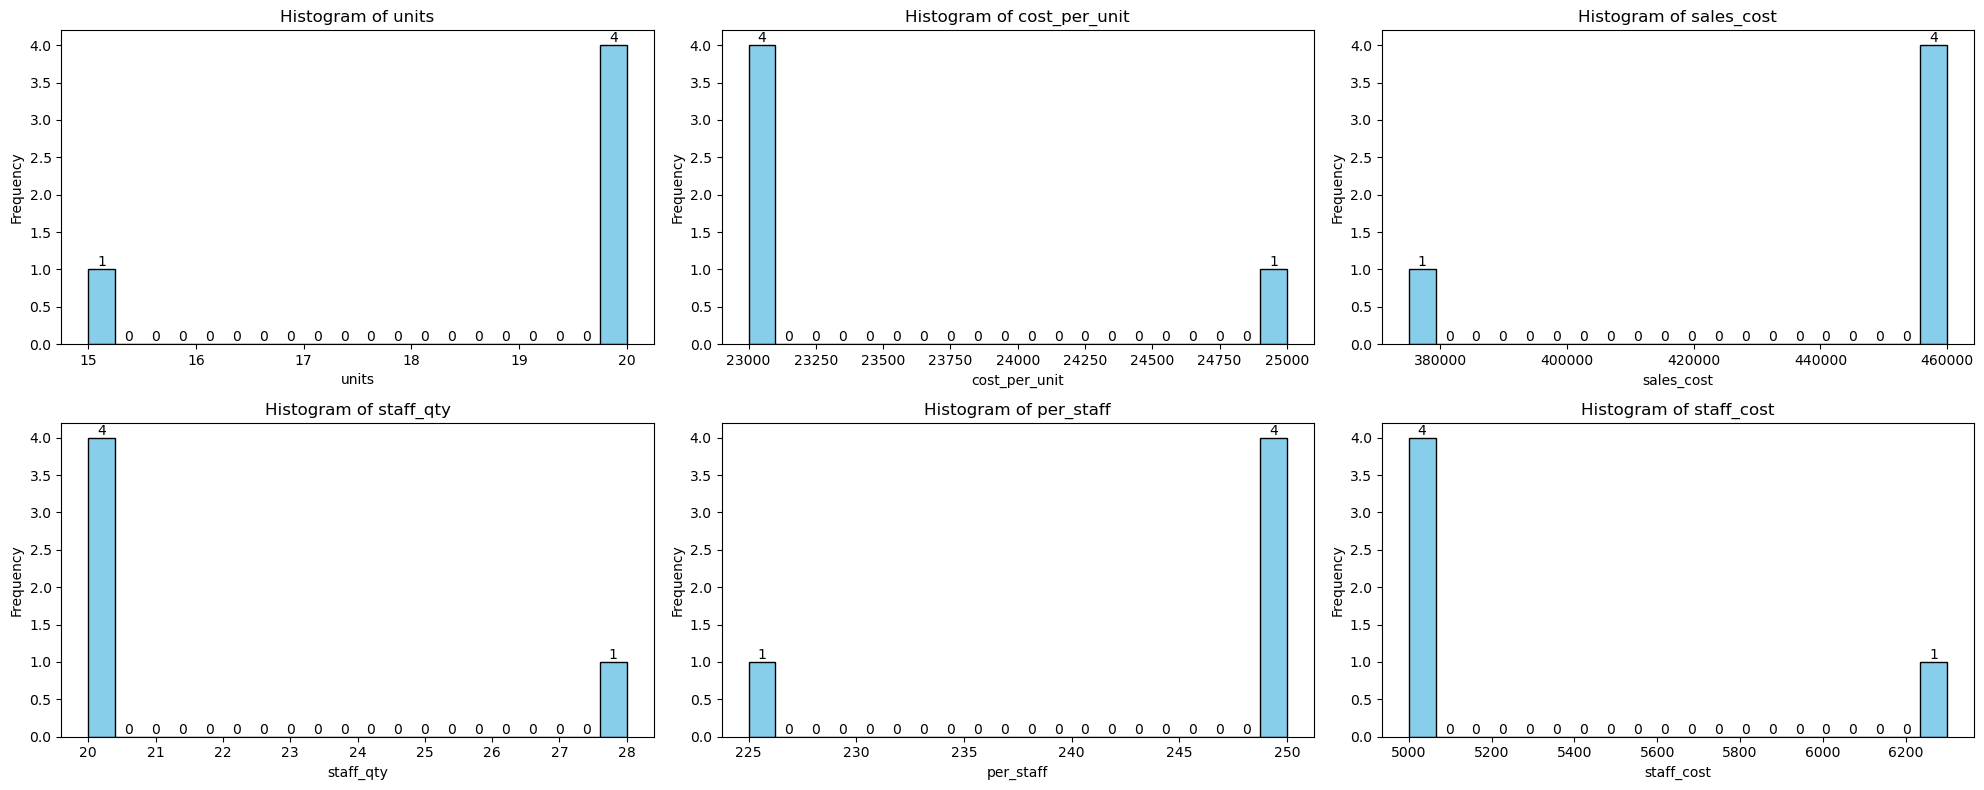

In [41]:
import matplotlib.pyplot as plt

# Create a figure with 2 rows and 3 columns of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 8))

# List of parameter names (assuming you have columns with these names)
parameters = ['units', 'cost_per_unit', 'sales_cost', 'staff_qty', 'per_staff', 'staff_cost']

# Loop through the subplots and plot histograms for each parameter
for i, ax in enumerate(axes.flatten()):
    if i < len(parameters):  # Ensure not to exceed the number of parameters
        MiddleEast_sales[parameters[i]].plot(kind='hist', bins=20, color='skyblue', edgecolor='black', ax=ax)
        ax.set_title(f"Histogram of {parameters[i]}")
        ax.set_xlabel(parameters[i])
        ax.set_ylabel("Frequency")

        # Add frequency count annotations to each bar
        for container in ax.containers:
            ax.bar_label(container, fmt='%d', label_type='edge')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


# Southeast asia sales

In [42]:
SouthEastAsia_sales = data[data['region'] == 'Southeast asia']
SouthEastAsia_sales[['units','cost_per_unit','sales_cost','staff_qty','per_staff','staff_cost']].describe()

,units,cost_per_unit,sales_cost,staff_qty,per_staff,staff_cost
count,7.0,7.000000,7.000000,7.00000,7.000000,7.000000
mean,25.0,32285.714286,807142.857143,27.00000,285.714286,7642.857143
std,0.0,2927.700219,73192.505471,3.41565,24.397502,243.975018
min,25.0,28000.000000,700000.000000,25.00000,250.000000,7500.000000
25%,25.0,31000.000000,775000.000000,25.00000,275.000000,7500.000000
50%,25.0,34000.000000,850000.000000,25.00000,300.000000,7500.000000
75%,25.0,34000.000000,850000.000000,28.50000,300.000000,7750.000000
max,25.0,34000.000000,850000.000000,32.00000,300.000000,8000.000000


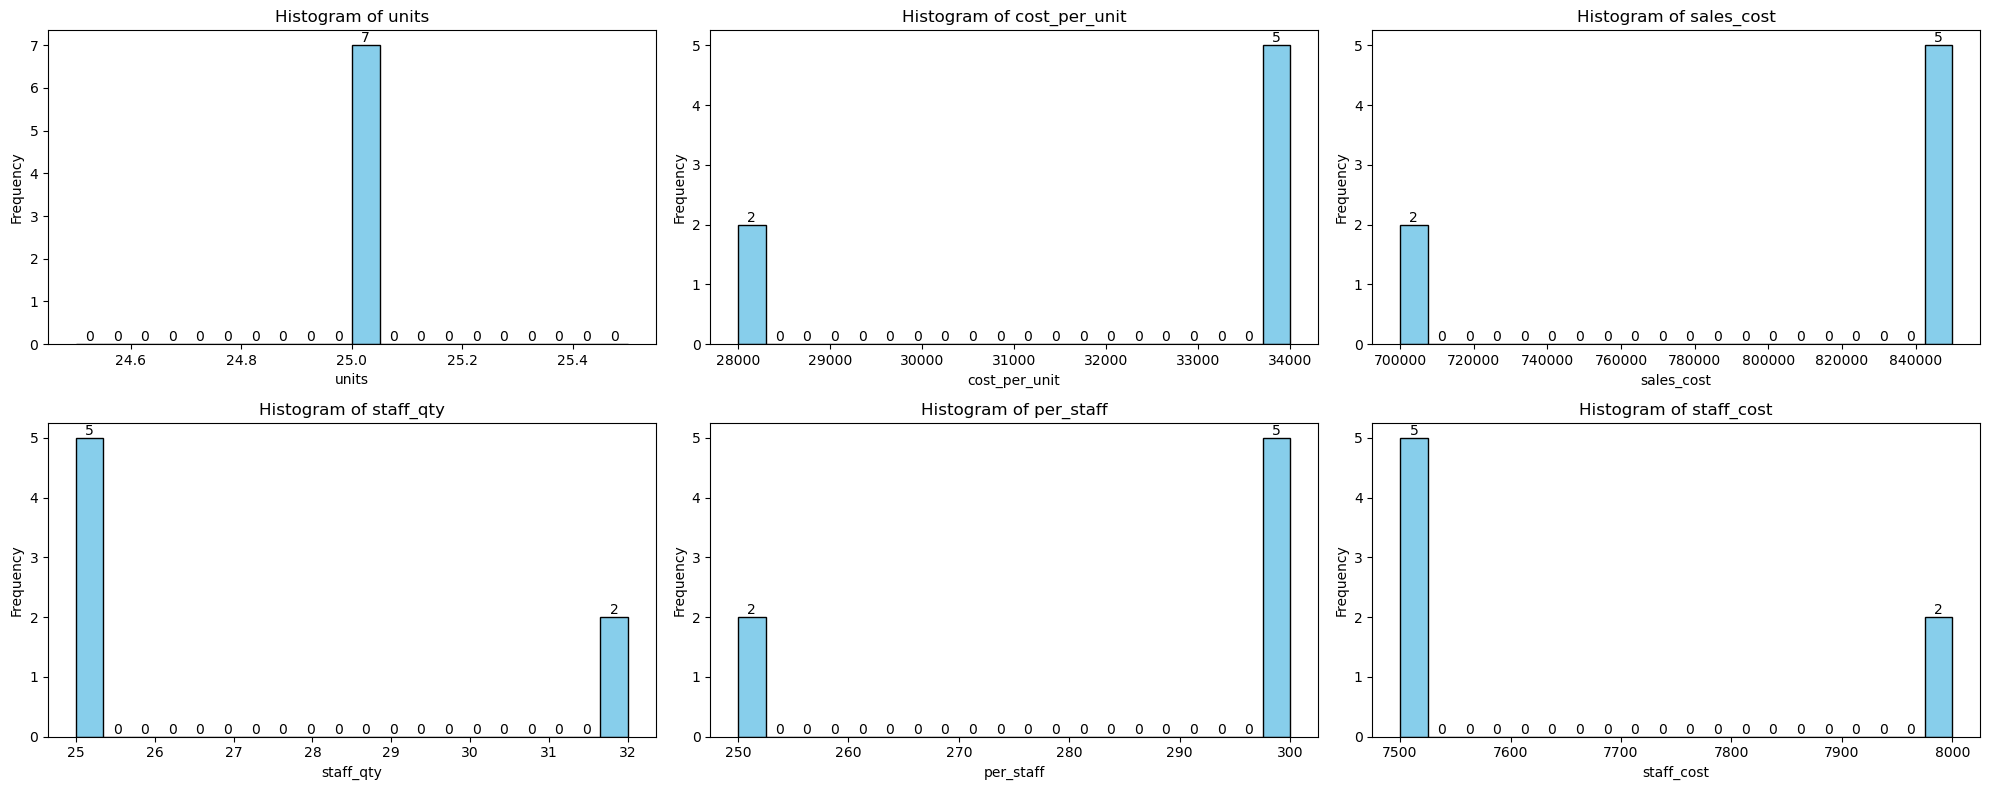

In [43]:
import matplotlib.pyplot as plt

# Create a figure with 2 rows and 3 columns of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 8))

# List of parameter names (assuming you have columns with these names)
parameters = ['units', 'cost_per_unit', 'sales_cost', 'staff_qty', 'per_staff', 'staff_cost']

# Loop through the subplots and plot histograms for each parameter
for i, ax in enumerate(axes.flatten()):
    if i < len(parameters):  # Ensure not to exceed the number of parameters
        SouthEastAsia_sales[parameters[i]].plot(kind='hist', bins=20, color='skyblue', edgecolor='black', ax=ax)
        ax.set_title(f"Histogram of {parameters[i]}")
        ax.set_xlabel(parameters[i])
        ax.set_ylabel("Frequency")

        # Add frequency count annotations to each bar
        for container in ax.containers:
            ax.bar_label(container, fmt='%d', label_type='edge')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


# Africa sales

In [44]:
Africa_sales = data[data['region'] == 'Africa']
Africa_sales[['units','cost_per_unit','sales_cost','staff_qty','per_staff','staff_cost']].describe()

,units,cost_per_unit,sales_cost,staff_qty,per_staff,staff_cost
count,9.0,9.0,9.0,9.0,9.0,9.0
mean,27.0,20000.0,540000.0,32.0,325.0,10300.0
std,0.0,7500.0,202500.0,3.0,37.5,300.0
min,27.0,15000.0,405000.0,30.0,275.0,9900.0
25%,27.0,15000.0,405000.0,30.0,275.0,9900.0
50%,27.0,15000.0,405000.0,30.0,350.0,10500.0
75%,27.0,30000.0,810000.0,36.0,350.0,10500.0
max,27.0,30000.0,810000.0,36.0,350.0,10500.0


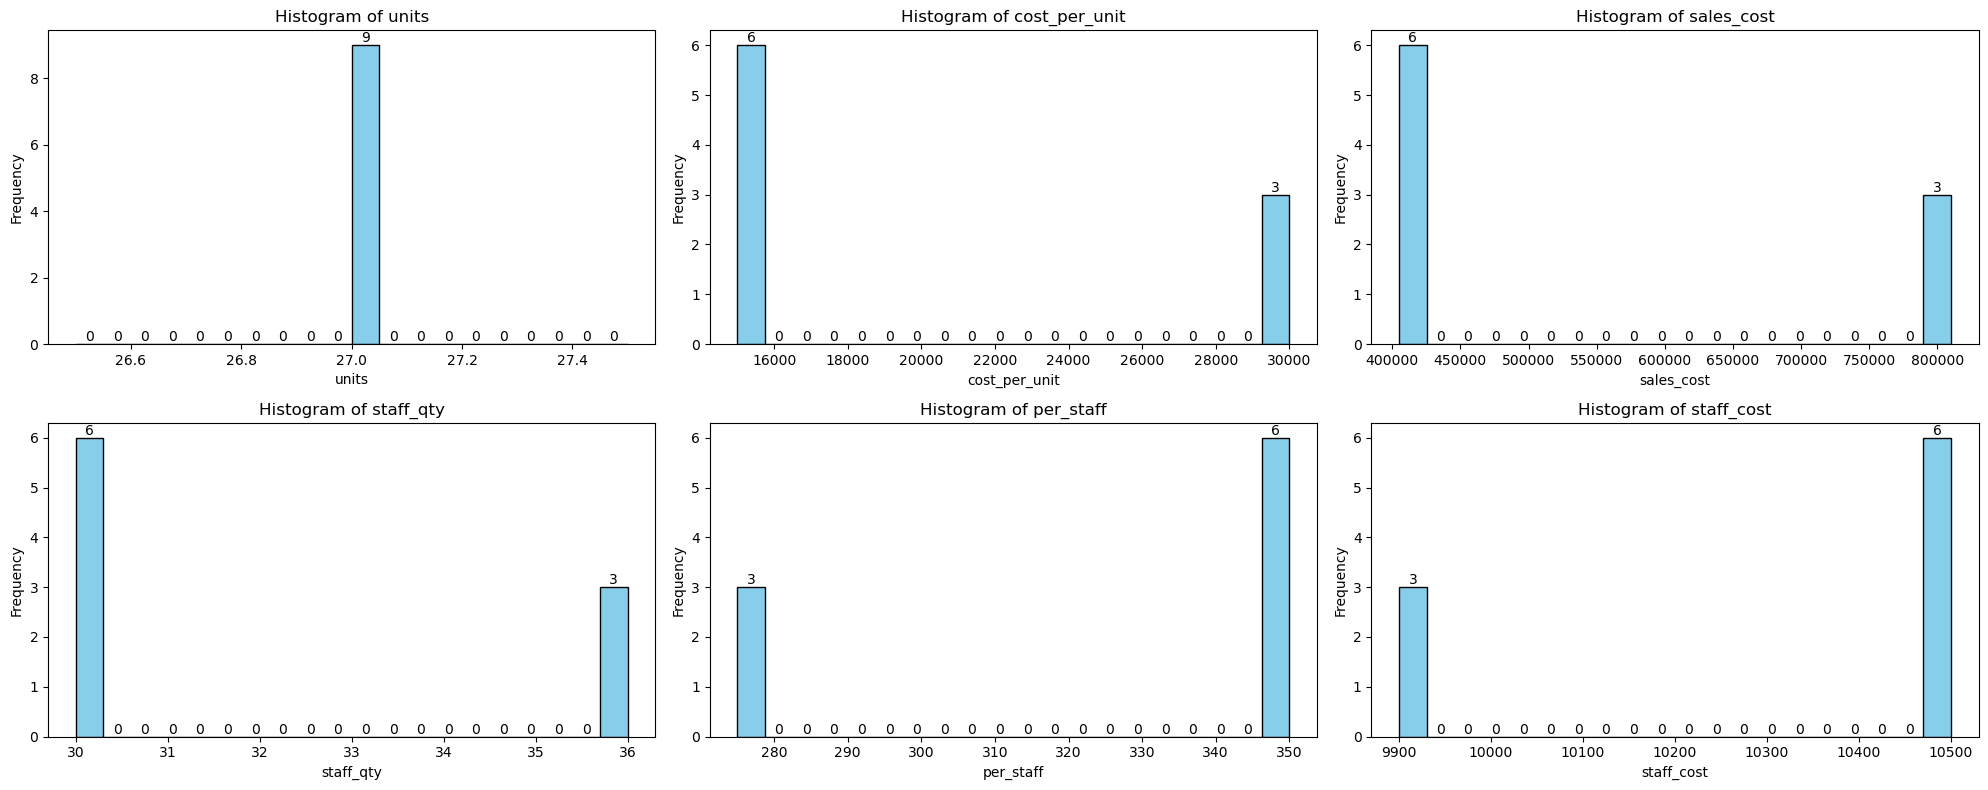

In [45]:
import matplotlib.pyplot as plt

# Create a figure with 2 rows and 3 columns of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 8))

# List of parameter names (assuming you have columns with these names)
parameters = ['units', 'cost_per_unit', 'sales_cost', 'staff_qty', 'per_staff', 'staff_cost']

# Loop through the subplots and plot histograms for each parameter
for i, ax in enumerate(axes.flatten()):
    if i < len(parameters):  # Ensure not to exceed the number of parameters
        Africa_sales[parameters[i]].plot(kind='hist', bins=20, color='skyblue', edgecolor='black', ax=ax)
        ax.set_title(f"Histogram of {parameters[i]}")
        ax.set_xlabel(parameters[i])
        ax.set_ylabel("Frequency")

        # Add frequency count annotations to each bar
        for container in ax.containers:
            ax.bar_label(container, fmt='%d', label_type='edge')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


# Australia sales

In [46]:
Australia_sales = data[data['region'] == 'Australia']
Australia_sales[['units','cost_per_unit','sales_cost','staff_qty','per_staff','staff_cost']].describe()

,units,cost_per_unit,sales_cost,staff_qty,per_staff,staff_cost
count,11.000000,11.000000,1.100000e+01,11.000000,11.000000,11.000000
mean,37.363636,32272.727273,1.210455e+06,23.727273,281.818182,9018.181818
std,0.504525,10090.499582,3.960521e+05,15.640274,163.970618,6911.992214
min,37.000000,25000.000000,9.250000e+05,4.000000,75.000000,300.000000
25%,37.000000,25000.000000,9.250000e+05,4.000000,75.000000,300.000000
50%,37.000000,25000.000000,9.250000e+05,35.000000,400.000000,14000.000000
75%,38.000000,45000.000000,1.710000e+06,35.000000,400.000000,14000.000000
max,38.000000,45000.000000,1.710000e+06,35.000000,400.000000,14000.000000


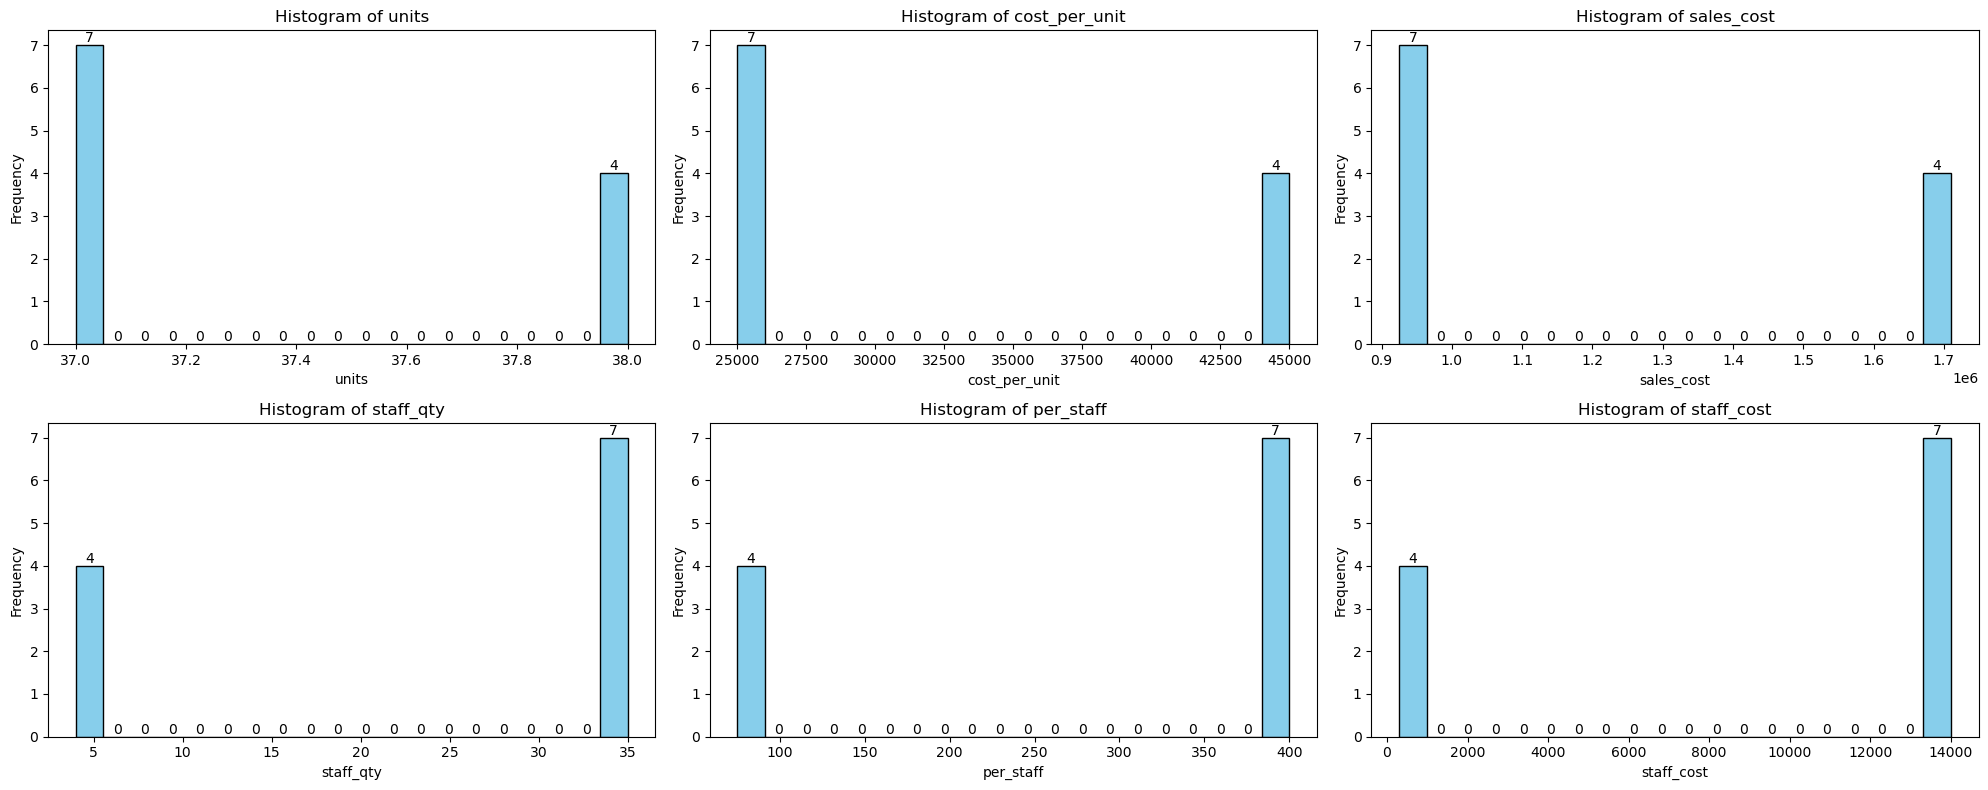

In [47]:
import matplotlib.pyplot as plt

# Create a figure with 2 rows and 3 columns of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 8))

# List of parameter names (assuming you have columns with these names)
parameters = ['units', 'cost_per_unit', 'sales_cost', 'staff_qty', 'per_staff', 'staff_cost']

# Loop through the subplots and plot histograms for each parameter
for i, ax in enumerate(axes.flatten()):
    if i < len(parameters):  # Ensure not to exceed the number of parameters
        Australia_sales[parameters[i]].plot(kind='hist', bins=20, color='skyblue', edgecolor='black', ax=ax)
        ax.set_title(f"Histogram of {parameters[i]}")
        ax.set_xlabel(parameters[i])
        ax.set_ylabel("Frequency")

        # Add frequency count annotations to each bar
        for container in ax.containers:
            ax.bar_label(container, fmt='%d', label_type='edge')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


# South America sales

In [48]:
SouthAmerica_sales = data[data['region'] == 'South America']
SouthAmerica_sales[['units','cost_per_unit','sales_cost','staff_qty','per_staff','staff_cost']].describe()

,units,cost_per_unit,sales_cost,staff_qty,per_staff,staff_cost
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,23.620690,25827.586207,589413.793103,21.241379,224.137931,6427.586207
std,3.468365,7358.517735,108391.327157,12.146884,143.066349,7292.995492
min,21.000000,17000.000000,493000.000000,8.000000,100.000000,800.000000
25%,21.000000,17000.000000,493000.000000,16.000000,150.000000,2400.000000
50%,21.000000,25000.000000,529000.000000,16.000000,150.000000,2400.000000
75%,29.000000,35000.000000,735000.000000,40.000000,450.000000,18000.000000
max,29.000000,35000.000000,735000.000000,40.000000,450.000000,18000.000000


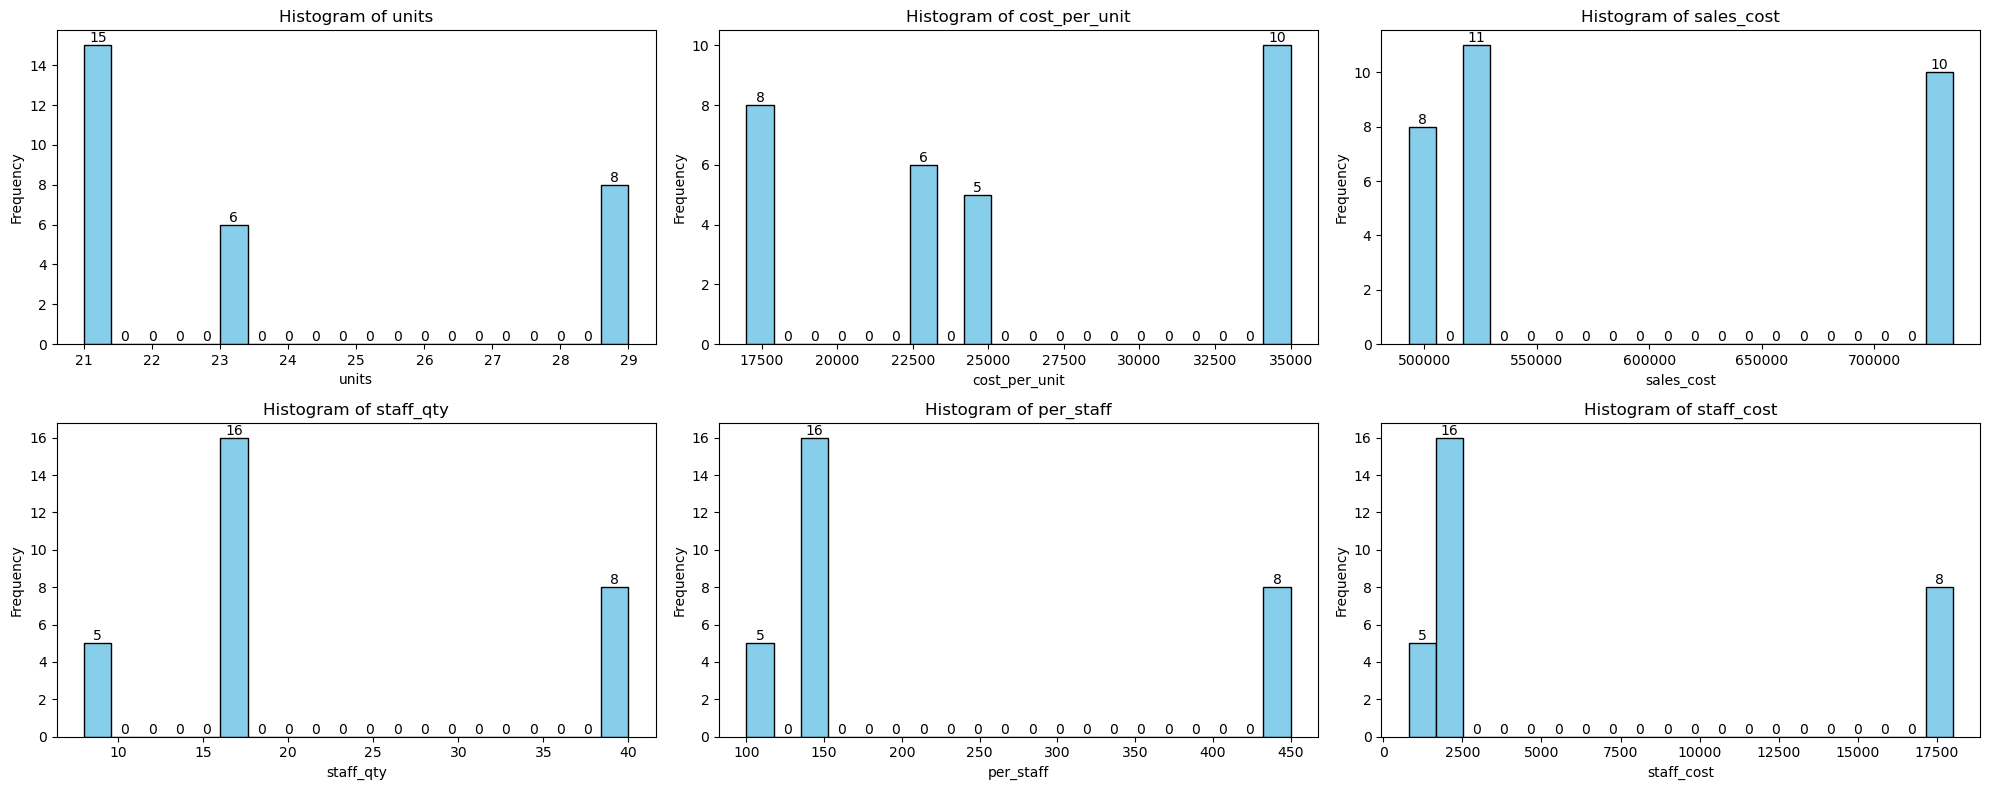

In [49]:
import matplotlib.pyplot as plt

# Create a figure with 2 rows and 3 columns of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 8))

# List of parameter names (assuming you have columns with these names)
parameters = ['units', 'cost_per_unit', 'sales_cost', 'staff_qty', 'per_staff', 'staff_cost']

# Loop through the subplots and plot histograms for each parameter
for i, ax in enumerate(axes.flatten()):
    if i < len(parameters):  # Ensure not to exceed the number of parameters
        SouthAmerica_sales[parameters[i]].plot(kind='hist', bins=20, color='skyblue', edgecolor='black', ax=ax)
        ax.set_title(f"Histogram of {parameters[i]}")
        ax.set_xlabel(parameters[i])
        ax.set_ylabel("Frequency")

        # Add frequency count annotations to each bar
        for container in ax.containers:
            ax.bar_label(container, fmt='%d', label_type='edge')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


# China sales

In [50]:
China_sales = data[data['region'] == 'China']
China_sales[['units','cost_per_unit','sales_cost','staff_qty','per_staff','staff_cost']].describe()

,units,cost_per_unit,sales_cost,staff_qty,per_staff,staff_cost
count,28.000000,28.000000,2.800000e+01,28.000000,28.000000,28.000000
mean,27.392857,28714.285714,7.347143e+05,24.535714,245.535714,7821.428571
std,8.001571,9835.149146,2.651123e+05,12.446871,150.931302,8666.895601
min,13.000000,12000.000000,4.420000e+05,12.000000,125.000000,1500.000000
25%,24.000000,28500.000000,4.440000e+05,20.000000,175.000000,3500.000000
50%,24.000000,34000.000000,8.160000e+05,20.000000,175.000000,3500.000000
75%,33.250000,34000.000000,8.160000e+05,26.250000,256.250000,8250.000000
max,37.000000,35000.000000,1.120000e+06,45.000000,500.000000,22500.000000


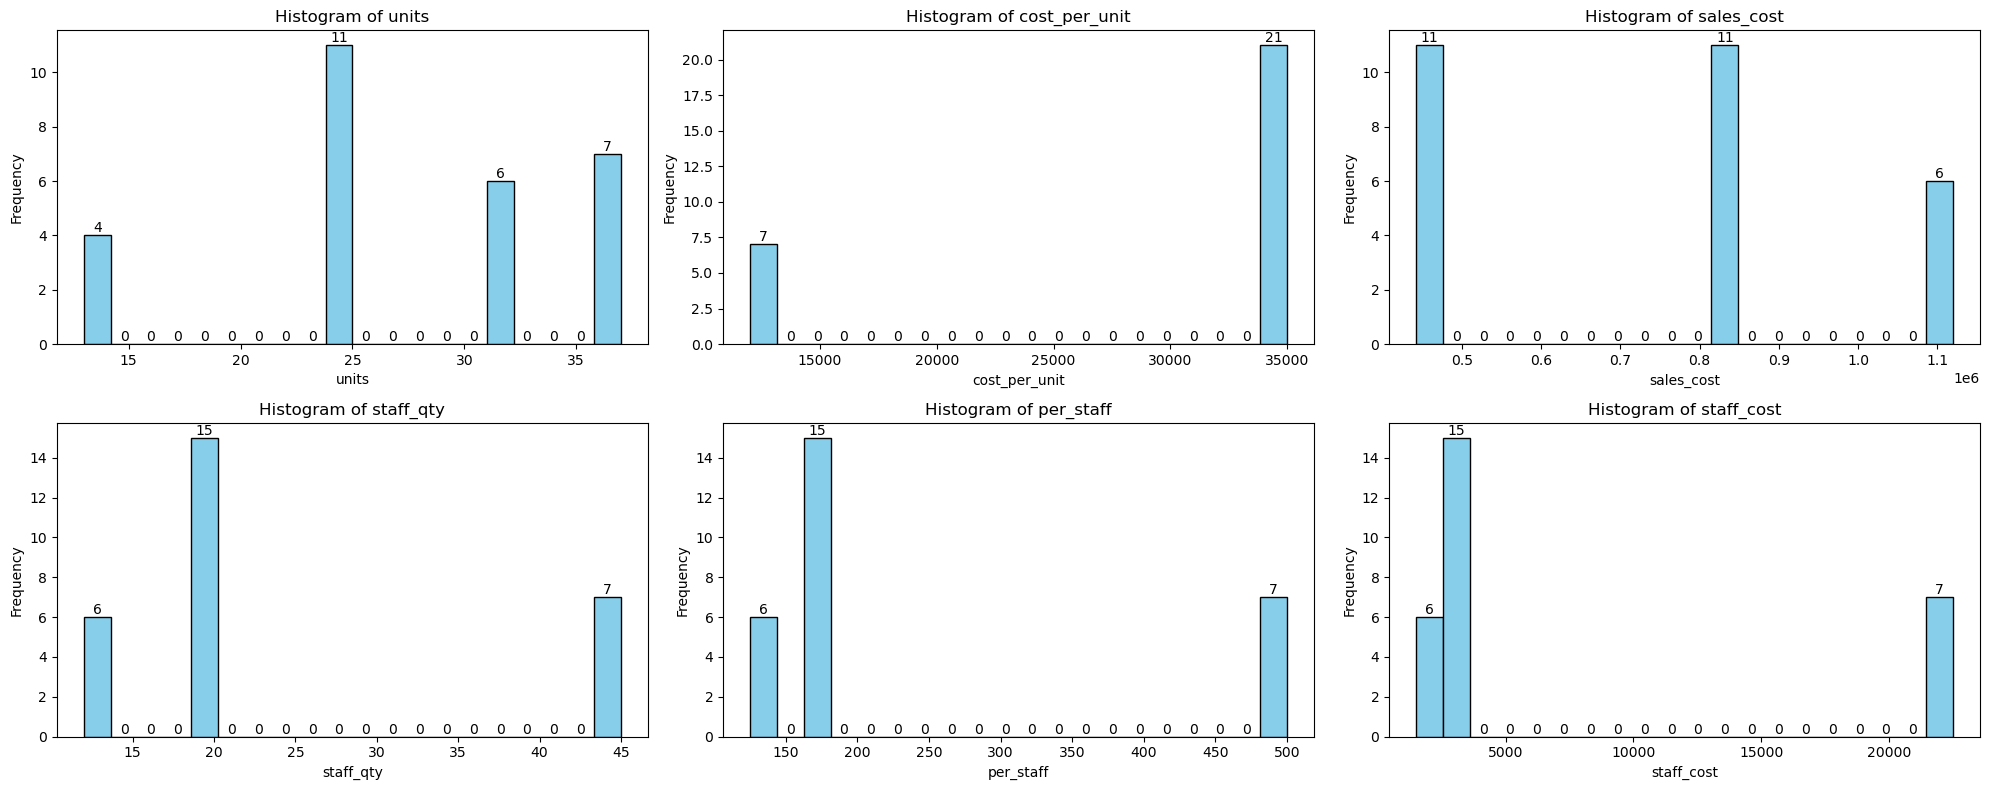

In [51]:
import matplotlib.pyplot as plt

# Create a figure with 2 rows and 3 columns of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 8))

# List of parameter names (assuming you have columns with these names)
parameters = ['units', 'cost_per_unit', 'sales_cost', 'staff_qty', 'per_staff', 'staff_cost']

# Loop through the subplots and plot histograms for each parameter
for i, ax in enumerate(axes.flatten()):
    if i < len(parameters):  # Ensure not to exceed the number of parameters
        China_sales[parameters[i]].plot(kind='hist', bins=20, color='skyblue', edgecolor='black', ax=ax)
        ax.set_title(f"Histogram of {parameters[i]}")
        ax.set_xlabel(parameters[i])
        ax.set_ylabel("Frequency")

        # Add frequency count annotations to each bar
        for container in ax.containers:
            ax.bar_label(container, fmt='%d', label_type='edge')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


# Overall Data - Correlation analysis

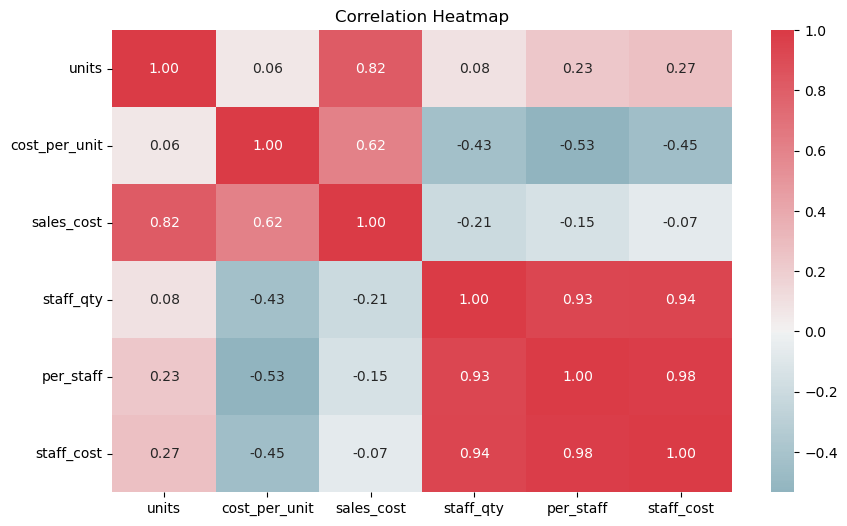

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# List of parameter names (assuming you have columns with these names)
parameters = ['units', 'cost_per_unit', 'sales_cost', 'staff_qty', 'per_staff', 'staff_cost']

# Calculate the correlation matrix
correlation_matrix = data[parameters].corr()

# Create a custom diverging color map
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Create a figure and axis for the correlation heatmap
plt.figure(figsize=(10, 6))
ax = plt.axes()

# Create a heatmap of the correlation matrix with custom color map
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f", ax=ax, center=0)

# Set the title
ax.set_title("Correlation Heatmap")

# Show the plot
plt.show()


# Anomaly detection

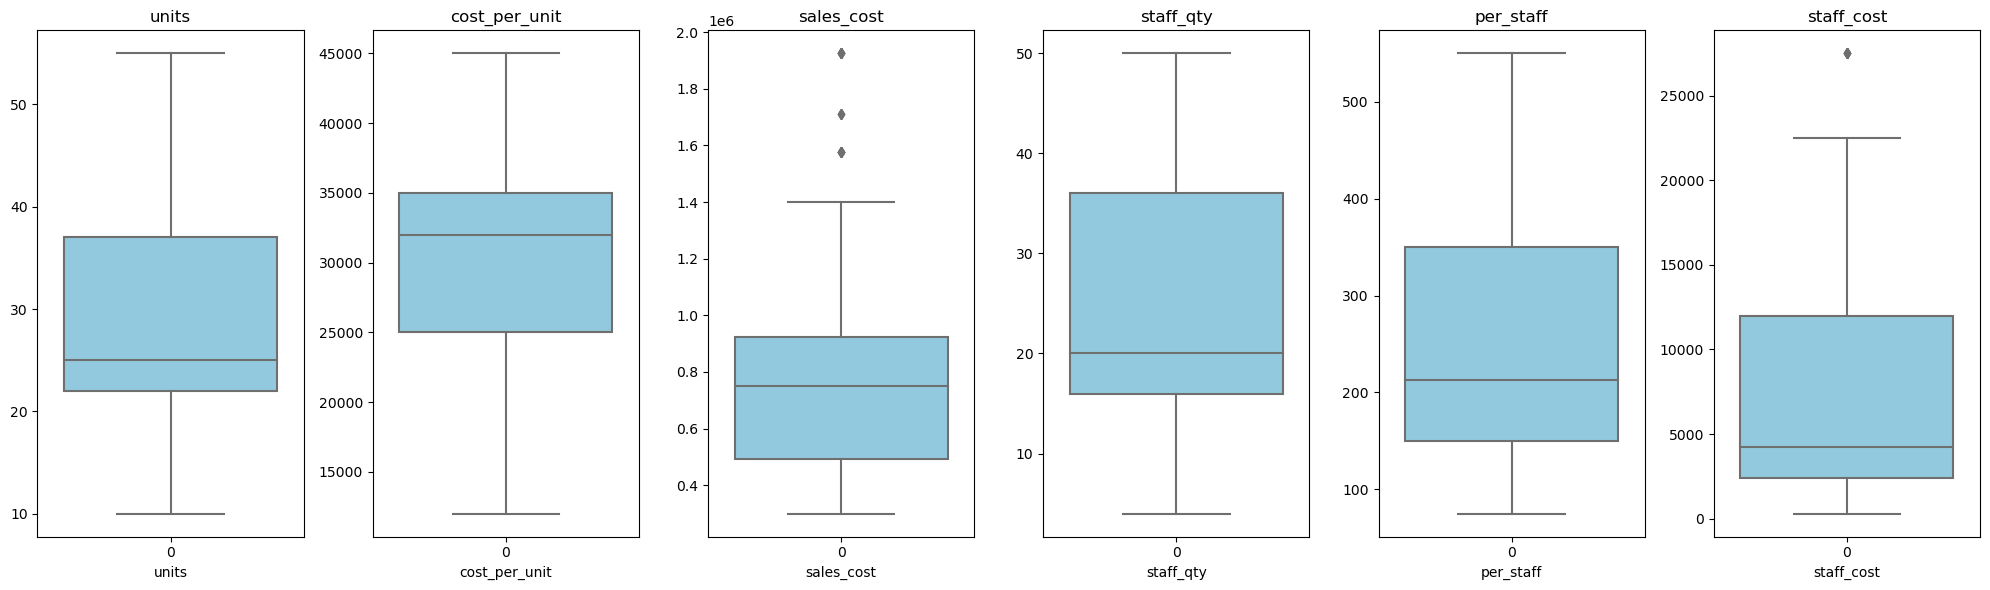

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of parameter names (assuming you have columns with these names)
parameters = ['units', 'cost_per_unit', 'sales_cost', 'staff_qty', 'per_staff', 'staff_cost']

# Create a figure with a single row and one column of subplots
fig, axes = plt.subplots(nrows=1, ncols=len(parameters), figsize=(20, 6))

# Loop through the subplots and create box plots for each parameter
for i, param in enumerate(parameters):
    sns.boxplot(data=data[param], ax=axes[i], color='skyblue')
    axes[i].set_title(f"{param}")
    axes[i].set_xlabel(param)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()
